# **Machine Learning to Identify and Create Realistic Chaotic Time Series**


**Auteur :**


***   AMALI Mohamed Amine**


**Academic Project**






# **1.Contexte**

Les systèmes dynamiques chaotiques sont des systèmes récurrents sensibles aux conditions initiales -déterministes-, ils sont exploités pour modéliser et expliquer de nombreux phénomènes naturels tels que la météo ou le climat.

Dans ce projet, on va s'intéresser à l'identification et la génération des séries temporelles chaotiques réalistiques à l'aide des techniques d'apprentisage automatique et d'apprentissage profond. 

Pour cela, notre étude concernera la résolution des deux systèmes physiques Lorenz-63 et Lorenz-96. 

Dans la première partie de ce projet, on résoudra les équations physiques à l'aide de l'algorithme de régression en apprentissage automatique, quant à la deuxième partie, elle étudiera les GAN pour la  génération la génération des séries temporelles chaotiques.

Objectif :
[x1,x2,x3] = f([x1,x2,x3][t-save_dt])

Evaluation : pdf (U_truth) vs pdf(U_simulé)
exposant lyapunov  visualisation

# **2. Problématique**

Peut-on résoudre les équations physiques Lorenz-63 et Lorenz-96 à l'aide de la régression ? et créer un GAN pour générer des séries temporelles chaotiques associées?

# **3. Méthodologie + code**

Dans cette section, nous allons expliciter les méthodes déployées avec leur code.

## **3.1 Lorenz 96**

Génération et représentation des données.

In [ ]:
from L96 import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
initX, initY = np.load('./initX.npy'), np.load('./initY.npy')
np.random.seed(123)

In [ ]:
l96_two = L96TwoLevel(save_dt=0.001, X_init=initX, Y_init=initY)

In [ ]:
l96_two.iterate(10)

In [ ]:
h2 = l96_two.history

In [ ]:
h2

<xarray.Dataset>
Dimensions:   (time: 10001, x: 36, y: 360)
Coordinates:
  * time      (time) float64 0.0 0.001 0.002 0.003 ... 9.997 9.998 9.999 10.0
  * x         (x) int64 0 1 2 3 4 5 6 7 8 9 10 ... 26 27 28 29 30 31 32 33 34 35
  * y         (y) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    X         (time, x) float64 7.222 2.999 1.425 3.226 ... -1.605 3.599 5.081
    B         (time, x) float64 -3.124 -1.743 -0.7543 ... 0.4533 -1.158 -2.23
    Y_mean    (time, x) float64 0.3124 0.1743 0.07543 ... -0.0446 0.1172 0.2215
    Y2_mean   (time, x) float64 0.19 0.05604 0.006333 ... 0.01672 0.0443 0.1178
    X_repeat  (time, y) float64 7.222 7.222 7.222 7.222 ... 5.081 5.081 5.081
    Y         (time, y) float64 0.1251 0.4696 -0.06133 ... 0.5112 0.4959 0.05107

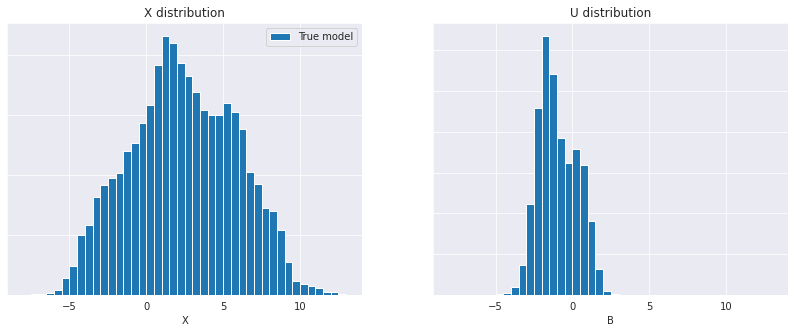

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
h2.X.plot.hist(bins=np.arange(-8, 13.5, 0.5), ax=ax1, label='True model')
h2.B.plot.hist(bins=np.arange(-8, 13.5, 0.5), ax=ax2, label='True model')
ax1.set_yticklabels([]); ax2.set_yticklabels([])
ax1.set_title('X distribution')
ax2.set_title('U distribution')
ax1.legend()
fig.savefig('./X-Y-hists.jpeg', dpi=200)

In [ ]:
x_theta = [2*np.pi /36 * i for i in range(37)]
y_theta = [2*np.pi /360 * i for i in range(361)]

In [ ]:
def add_point(x):
    return np.append(x.values, x[0])

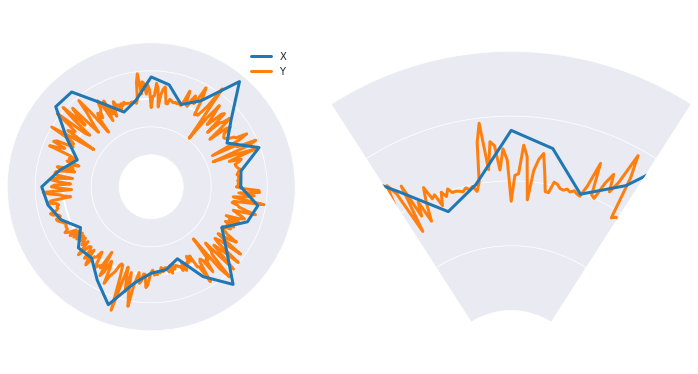

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax1 = plt.axes([0, 0, 0.4, 1], projection='polar')
#ax1 = fig.add_subplot(121, projection='polar')
ax1.plot(x_theta, add_point(h2.X[-1]), lw=3, zorder=10, label='X')
ax1.plot(y_theta, add_point(h2.Y[-1])*10, lw=3, label='Y')
ax1.set_rmin(-14); ax1.set_rmax(14)
l = ax1.set_rgrids([-7, 0, 7], labels=['', '', ''])[0][1]
l.set_linewidth(2)
ax1.set_thetagrids([])
ax1.set_rorigin(-22)
ax1.legend(frameon=False, loc=1);
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

ax2 = plt.axes([0.4, 0, 0.6, 1], projection='polar')
#ax2 = fig.add_subplot(122, projection='polar')
ax2.plot(x_theta, add_point(h2.X[-1]), lw=3, zorder=10)
ax2.plot(y_theta, add_point(h2.Y[-1])*10, lw=3)
ax2.set_rmin(-14); ax2.set_rmax(14)
ax2.set_thetalim(0+1, np.pi-1)
l2 = ax2.set_rgrids([-7, 0, 7], labels=['', '', ''])[0][1]
l2.set_linewidth(20)
ax2.set_thetagrids([])
ax2.set_rorigin(-22)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

In [ ]:
U = h2.B
X = h2.X
print(X.shape,U.shape)

(10001, 36) (10001, 36)


### Régression linéaire

### Régression linéaire locale

In [ ]:
l96_five = L96TwoLevel(save_dt=0.001, X_init=initX, Y_init=initY)

In [ ]:
l96_five.iterate(50)

In [ ]:
h5 = l96_five.history
print(np.shape(h5.X))

(50001, 36)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
def weight_gauss(x0, xi, lambd): #gaussian weighting function
    
  N = np.linalg.norm(x0-xi)/72 #norm / nb of dimensions
  w = np.exp((-(N)**2)/lambd)
  
  return w

def compute_weights(x0,x,f_w,lambd):
  M = len(x)
  w = np.zeros(M, dtype = float)
  for i in range(M):
    w[i] = f_w(x0,x[i],lambd)
  w = w/sum(w)
  return w

def keep_K_best(Weights,dataX,dataY,K): #keeps the K nearest points from the current value
  Sort = np.argsort(Weights)[-K:]
  return dataX[Sort],dataY[Sort],Weights[Sort]

In [ ]:
def local_linear_regression(dataX,dataY,X_t,f_w,lambd,K,reg):
  Weights = compute_weights(X_t,dataX,f_w,lambd)
  dataX2,dataY2,Weights2 = keep_K_best(Weights,dataX,dataY,K)
  reg.fit(dataX2,dataY2,np.ravel(Weights2))
  print(np.shape(reg.coef_))
  X_pred = reg.predict([X_t])
  
  return X_pred

In [ ]:
import scipy.stats as stats
from math import floor

def kull_div(simulated_data,real_data):
  #we have to estimate the probability density of the simulated data and the real data :
  #we use these intervals : ( ]-inf,-2[ ; [-2,-1.9[ ; [-1.9,-1.8[ ... [1.8,1.9[ ; [1.9,2[ ; [2,+inf[ )
  Arr_sim = np.zeros(42, dtype = float)
  Arr_real = np.zeros(42, dtype = float)
  s_data_1d = simulated_data[:,-1]
  r_data_1d = real_data[:,-1]
  for i in range(len(s_data_1d)): #we fill the array depending on the approximation of the value of s_data_1d[i] by 1/10
                                  # in order : (0,-0.1,0.1,-0.2,0.2,...,1.9,-2.0,> 1.9, < -2.0)
    approx = floor(10*s_data_1d[i]) 
    if approx > 19:
      Arr_sim[40] = Arr_sim[40] + 1
    elif approx < -20:
      Arr_sim[41] = Arr_sim[41] + 1
    elif approx >= 0:
      Arr_sim[2*approx] = Arr_sim[2*approx] + 1
    else :
      Arr_sim[2*abs(approx)-1] = Arr_sim[2*abs(approx)-1] + 1

  for i in range(len(r_data_1d)):
    approx = floor(10*r_data_1d[i]) 
    if approx > 19:
      Arr_real[40] = Arr_real[40] + 1
    elif approx < -20:
      Arr_real[41] = Arr_real[41] + 1
    elif approx >= 0:
      Arr_real[2*approx] = Arr_real[2*approx] + 1
    else :
      Arr_real[2*abs(approx)-1] = Arr_real[2*abs(approx)-1] + 1
  return stats.entropy(Arr_sim,Arr_real)

def informations(simulated_data,real_data,type_var):
  Ns,Ps = np.shape(simulated_data)
  Nr,Pr = np.shape(real_data)
  N = min(Ns,Nr)
  Ran = np.arange(N)


  plt.plot(Ran,simulated_data[:N,-1], label = "simulated trajectory")
  plt.plot(Ran,real_data[:N,-1], label = "real trajectory")
  plt.legend(fontsize = "large")
  plt.title("example of trajectory obtained")
  plt.show()

  plt.hist(simulated_data[:,-1], density = True, bins = 50, label = "simulated pdf")
  plt.hist(real_data[:,-1], density = True, bins = 50, label = "real pdf")
  plt.legend(fontsize = "large")
  plt.title("pdf corresponding to the trajectory obtained")
  plt.show()
  if type_var == 'U':
    print("Kullback divergence : ", kull_div(simulated_data, real_data))

  print("mean of the simulated data : ", np.mean(simulated_data[:,-1]))
  print("mean of the real data : ", np.mean(real_data[:,-1]))
  print()
  print("variance of the simulated data : ", np.var(simulated_data[:,-1]))
  print("variance of the real data : ", np.var(real_data[:,-1]))
  print()

  real_mean = np.mean(real_data[:,-1])*np.ones(10, dtype = float)
  real_var = np.var(real_data[:,-1])*np.ones(10, dtype = float)
  Ran_param = np.zeros(10,dtype = float)
  simulated_mean = np.zeros(10,dtype = float)
  simulated_var = np.zeros(10,dtype = float)
  for i in range(10):
    ni = ((i+1)*Ns)//10
    Ran_param[i] = ni
    simulated_mean[i] = np.mean(simulated_data[:ni,-1])
    simulated_var[i] = np.var(simulated_data[:ni,-1])

  plt.plot(Ran_param,simulated_mean)
  plt.plot(Ran_param,real_mean, label = "real mean")
  plt.legend(fontsize = "large")
  plt.title("mean of the serie obtained at differents steps")
  plt.show()

  plt.plot(Ran_param,simulated_var)
  plt.plot(Ran_param,real_var, label = "real variance")
  plt.legend(fontsize = "large")
  plt.title("variance of the serie obtained at differents steps")
  plt.show()

In [ ]:
X5 = h5.X
U5 = h5.B
U5 = np.concatenate((X5,U5),axis = 1)

In [ ]:
reg = LinearRegression(fit_intercept = True)

dataX,dataY = U5[0:-1,:],U5[1::,:]
print(dataX.shape)
print(dataY.shape)

(Ndata,Pdata) = np.shape(dataX)

X0 = dataX[0]-0.1
print(np.amax(abs(X0)))
N = 1200
L = []
for i in range(N):
  X1 = local_linear_regression(dataX,dataY,X0,weight_gauss,0.01
                               ,5000,reg)[0]
  L.append(X1)
  print(i)
  print(np.amax(abs(X1)))
  X0 = np.copy(X1)

L_arr = np.array(L)
L_arr01 = L_arr[:,36:]
dataX01 = dataX[:,36:]
L_arr11 = L_arr[:,:36]
dataX11 = dataX[:,:36]

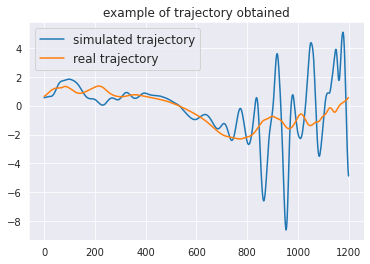

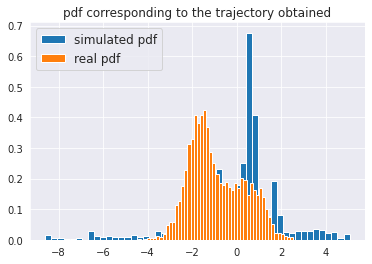

Kullback divergence :  0.5379832263580763
mean of the simulated data :  -0.10647653917411115
mean of the real data :  -0.9067853815583927

variance of the simulated data :  3.9890156722770915
variance of the real data :  1.4987991091593917



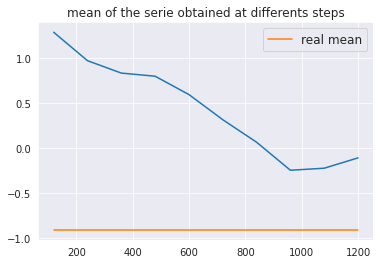

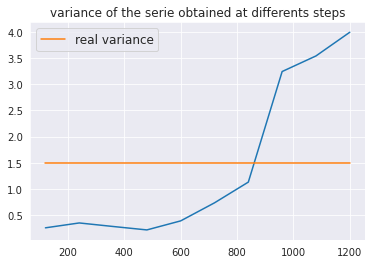

In [ ]:
informations(L_arr01,dataX01,'U')

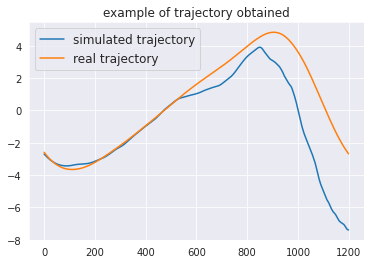

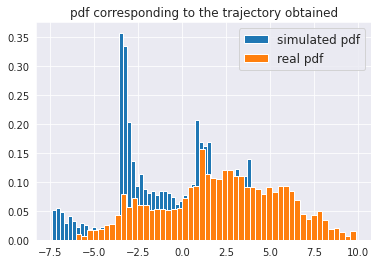

mean of the simulated data :  -0.8393236432718026
mean of the real data :  2.1747470230107937

variance of the simulated data :  8.284832469261149
variance of the real data :  11.661272686978169



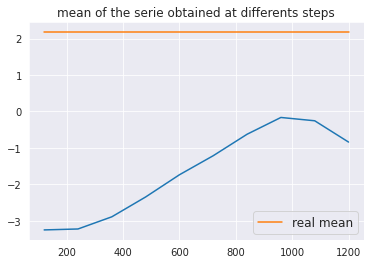

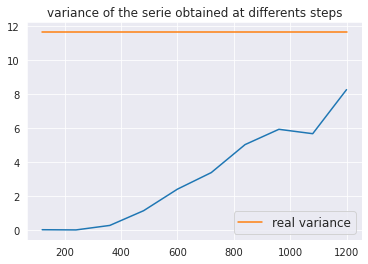

In [ ]:
informations(L_arr11,dataX11,'X')

In [ ]:
reg = LinearRegression(fit_intercept = True)

dataX,dataY = U5[0:-1,:],U5[1::,:]
print(dataX.shape)
print(dataY.shape)

(Ndata,Pdata) = np.shape(dataX)

X0 = dataX[0]-0.1
print(np.amax(abs(X0)))
N = 2000
L = []
for i in range(N):
  X1 = local_linear_regression(dataX,dataY,X0,weight_gauss,0.01
                               ,10000,reg)[0]
  L.append(X1)
  print(i)
  print(np.amax(abs(X1)))
  X0 = np.copy(X1)

L_arr = np.array(L)
L_arr02 = L_arr[:,36:]
dataX02 = dataX[:,36:]
L_arr12 = L_arr[:,:36]
dataX12 = dataX[:,:36]

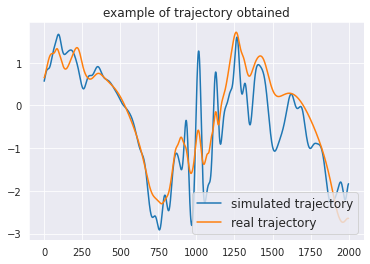

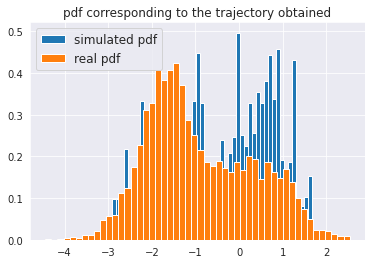

Kullback divergence :  0.23290099783589654
mean of the simulated data :  -0.4004226128100662
mean of the real data :  -0.9067853815583927

variance of the simulated data :  1.4468632385974032
variance of the real data :  1.4987991091593917



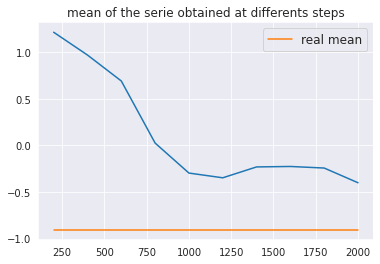

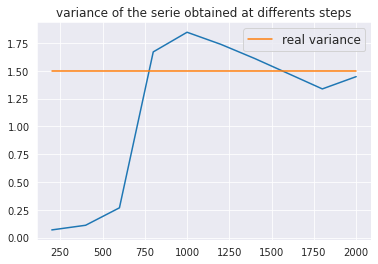

In [ ]:
informations(L_arr02,dataX02,'U')

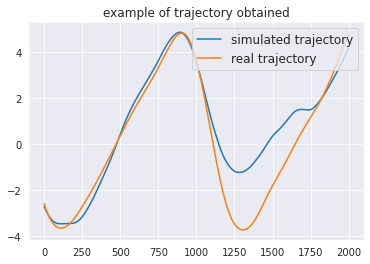

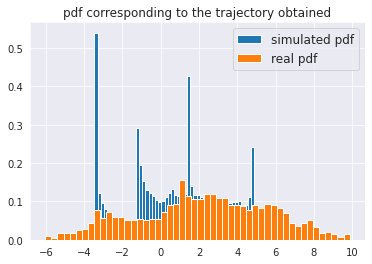

mean of the simulated data :  0.6876375284049434
mean of the real data :  2.1747470230107937

variance of the simulated data :  6.047581993153135
variance of the real data :  11.661272686978169



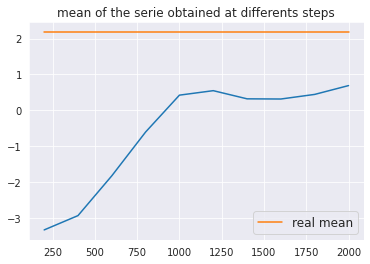

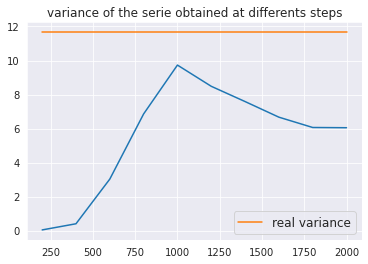

In [ ]:
informations(L_arr12,dataX12,'X')

In [ ]:
reg = LinearRegression(fit_intercept = True)

dataX,dataY = U5[0:-1,:],U5[1::,:]
print(dataX.shape)
print(dataY.shape)

(Ndata,Pdata) = np.shape(dataX)

X0 = dataX[0]-0.1
print(np.amax(abs(X0)))
N = 2000
L = []
for i in range(N):
  X1 = local_linear_regression(dataX,dataY,X0,weight_gauss,0.01
                               ,20000,reg)[0]
  L.append(X1)
  print(i)
  print(np.amax(abs(X1)))
  X0 = np.copy(X1)

L_arr = np.array(L)
L_arr03 = L_arr[:,36:]
dataX03 = dataX[:,36:]
L_arr13 = L_arr[:,:36]
dataX13 = dataX[:,:36]

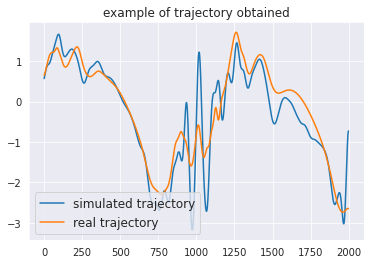

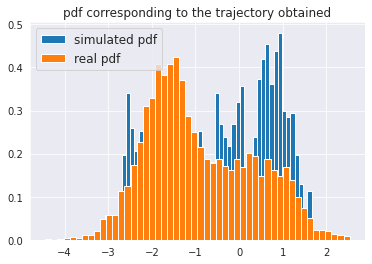

Kullback divergence :  0.2710804385967263
mean of the simulated data :  -0.33250513678997434
mean of the real data :  -0.9067853815583927

variance of the simulated data :  1.5571038099732581
variance of the real data :  1.4987991091593917



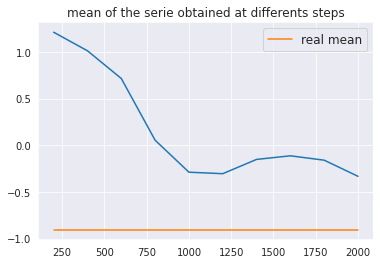

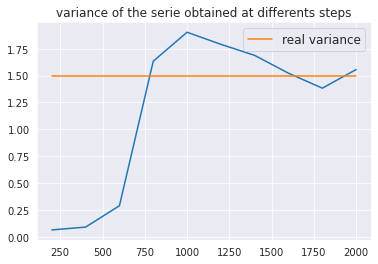

In [ ]:
informations(L_arr03,dataX03,'U')

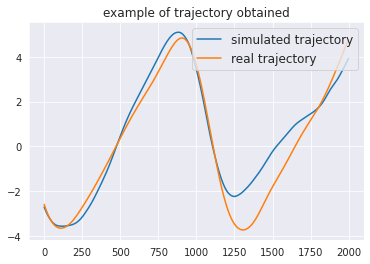

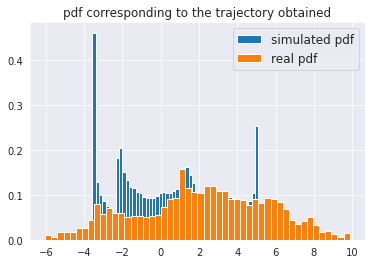

mean of the simulated data :  0.45988502253589975
mean of the real data :  2.1747470230107937

variance of the simulated data :  6.825722304451624
variance of the real data :  11.661272686978169



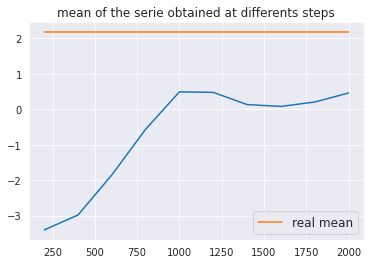

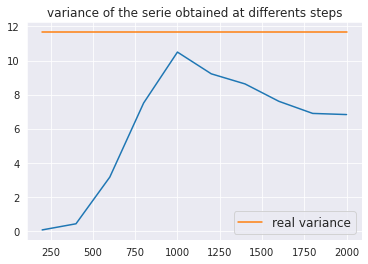

In [ ]:
informations(L_arr13,dataX13,'X')

In [ ]:
reg = LinearRegression(fit_intercept = True)

dataX,dataY = U5[0:-1,:],U5[1::,:]
print(dataX.shape)
print(dataY.shape)

(Ndata,Pdata) = np.shape(dataX)

X0 = dataX[0]-0.1
print(np.amax(abs(X0)))
N = 2000
L = []
for i in range(N):
  X1 = local_linear_regression(dataX,dataY,X0,weight_gauss,0.03
                               ,20000,reg)[0]
  L.append(X1)
  print(i)
  print(np.amax(abs(X1)))
  X0 = np.copy(X1)

L_arr = np.array(L)
L_arr04 = L_arr[:,36:]
dataX04 = dataX[:,36:]
L_arr14 = L_arr[:,:36]
dataX14 = dataX[:,:36]

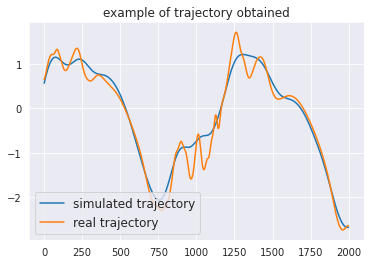

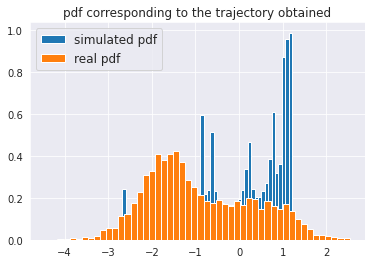

Kullback divergence :  0.45168823239509714
mean of the simulated data :  -0.13610943670432124
mean of the real data :  -0.9067853815583927

variance of the simulated data :  1.2270445003239083
variance of the real data :  1.4987991091593917



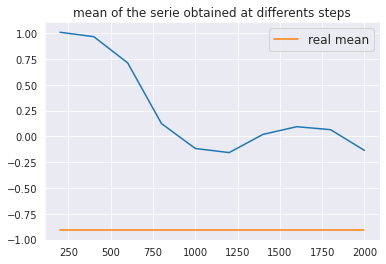

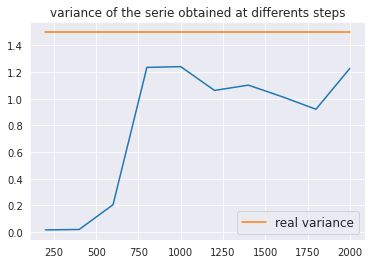

In [ ]:
informations(L_arr04,dataX04,'U')

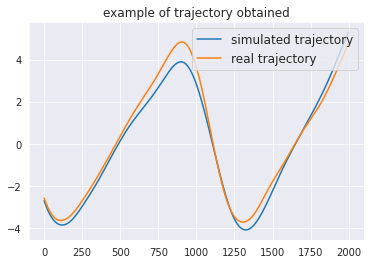

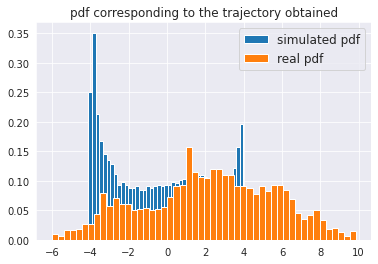

mean of the simulated data :  -0.16864922080579653
mean of the real data :  2.1747470230107937

variance of the simulated data :  7.5112858572122185
variance of the real data :  11.661272686978169



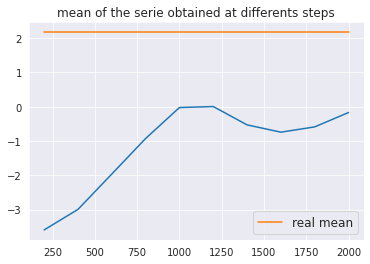

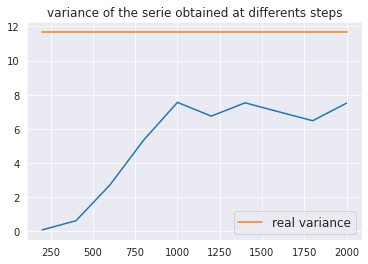

In [ ]:
informations(L_arr14,dataX14,'X')

In [ ]:
reg = LinearRegression(fit_intercept = True)

dataX,dataY = U5[0:-1,:],U5[1::,:]
print(dataX.shape)
print(dataY.shape)

(Ndata,Pdata) = np.shape(dataX)

X0 = dataX[0]-0.1
print(np.amax(abs(X0)))
N = 2000
L = []
for i in range(N):
  X1 = local_linear_regression(dataX,dataY,X0,weight_gauss,0.1
                               ,20000,reg)[0]
  L.append(X1)
  print(i)
  print(np.amax(abs(X1)))
  X0 = np.copy(X1)

L_arr = np.array(L)
L_arr05 = L_arr[:,36:]
dataX05 = dataX[:,36:]
L_arr15 = L_arr[:,:36]
dataX15 = dataX[:,:36]

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
8.243133757003719
(72, 72)
332
8.249859704694533
(72, 72)
333
8.256565833063867
(72, 72)
334
8.263242878357344
(72, 72)
335
8.269847634414674
(72, 72)
336
8.27640953856341
(72, 72)
337
8.2829018313077
(72, 72)
338
8.289341422002227
(72, 72)
339
8.295713440036714
(72, 72)
340
8.302032568662518
(72, 72)
341
8.308281763538524
(72, 72)
342
8.314449480558697
(72, 72)
343
8.320547155163206
(72, 72)
344
8.326584973815745
(72, 72)
345
8.332534033437348
(72, 72)
346
8.33841436407225
(72, 72)
347
8.344213454477815
(72, 72)
348
8.34993703895592
(72, 72)
349
8.355578693821212
(72, 72)
350
8.361141040458165
(72, 72)
351
8.366638955756777
(72, 72)
352
8.372060581002788
(72, 72)
353
8.377406051621923
(72, 72)
354
8.3826623205276
(72, 72)
355
8.387849167744662
(72, 72)
356
8.392938076299979
(72, 72)
357
8.397949570896422
(72, 72)
358
8.402867316117852
(72, 72)
359
8.407679155791254
(72, 72)
360
8.412403220063489
(72, 72)
361

In [ ]:
informations(L_arr05,dataX05,'U')

In [ ]:
informations(L_arr15,dataX15,'X')

### **3.1.2 GAN**

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
import numpy as np

In [ ]:
z = np.random.normal(0,1,size=X.shape)
input_shape_x = (1,)
input_shape_u = (1,)
input_shape_z = (1,) 

In [ ]:
def generateur(stddev):

    x = layers.Input(shape = input_shape_x, name='x')
    u = layers.Input(shape = input_shape_u, name='u')
    z = layers.Input(shape = input_shape_z, name='z')
    h = layers.Concatenate(axis=-1)([x, u, z])
    h = layers.GaussianNoise(stddev)(h)
    h = layers.Dense(16,activation='selu',kernel_regularizer=l2(0.001))(h)
    h = layers.GaussianNoise(stddev)(h)
    h = layers.Dense(16,activation='selu',kernel_regularizer=l2(0.001))(h)
    h = layers.GaussianNoise(stddev)(h)
    h = layers.Dense(1,activation='selu',kernel_regularizer=l2(0.001))(h)
    h = layers.BatchNormalization()(h)
    model = tf.keras.Model(inputs=[x, u, z], outputs=h,name='Generateur')
    


    return model

In [ ]:
def discriminateur(stddev):

    x = layers.Input(shape = input_shape_x, name='x')
    u = layers.Input(shape = input_shape_u, name='u')
    v = layers.Input(shape = (1,), name='v')
    h = layers.Concatenate(axis=-1)([x, u, v])
    h = layers.GaussianNoise(stddev)(h)
    h = layers.Dense(16,activation='selu',kernel_regularizer=l2(0.001))(h)
    h = layers.GaussianNoise(stddev)(h)
    h = layers.Dense(16,activation='selu',kernel_regularizer=l2(0.001))(h)
    h = layers.Dense(1,activation='sigmoid')(h)
    model = tf.keras.Model(inputs=[x, u, v], outputs=h,name='Discriminateur')
    


    return model

In [ ]:
def gan(generator,discriminator):

    discriminateur.trainable = False  
    x = layers.Input(shape = input_shape_x, name='x')
    u = layers.Input(shape = input_shape_u, name='u')
    z = layers.Input(shape = input_shape_z, name='z')
    h = generator([x, u, z])
    h = discriminator([x, u, h])
    model = tf.keras.Model(inputs=[x, u, z], outputs=h,name='GAN')
    

    return model

In [ ]:
generator = generateur(0.001)
discriminator = discriminateur(0.001)
gan_u = gan(generator,discriminator)

In [ ]:
generator.summary()

Model: "Generateur"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
u (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
z (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 3)            0           x[0][0]                          
                                                                 u[0][0]                 

In [ ]:
discriminator.summary()

Model: "Discriminateur"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
u (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
v (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 3)            0           x[0][0]                          
                                                                 u[0][0]             

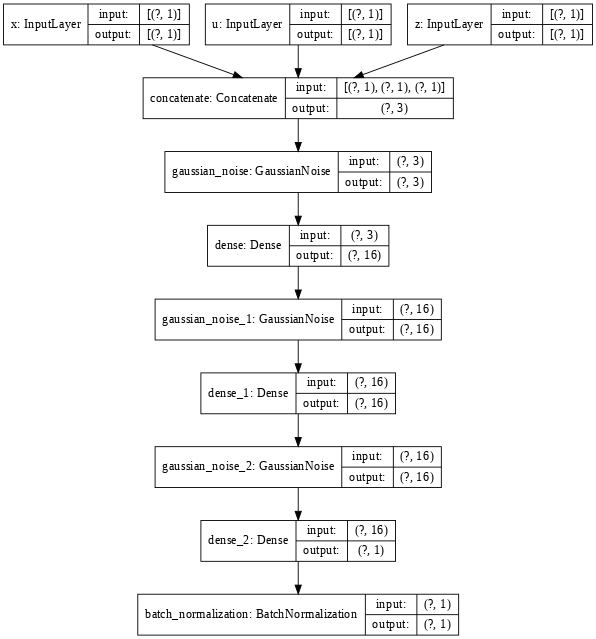

In [ ]:
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64,to_file='./generator.png')

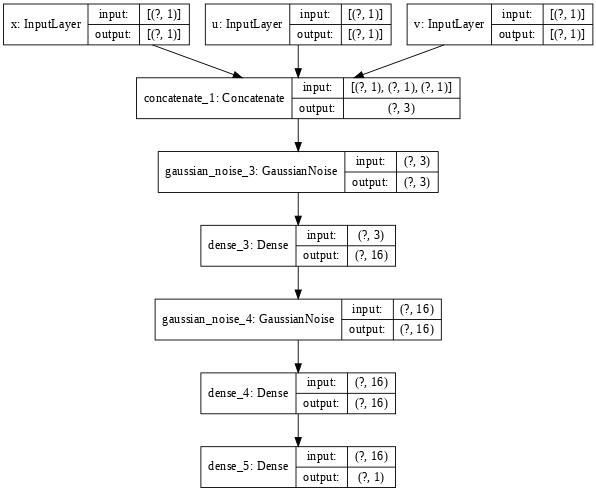

In [ ]:
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64,to_file='./discriminator.png')

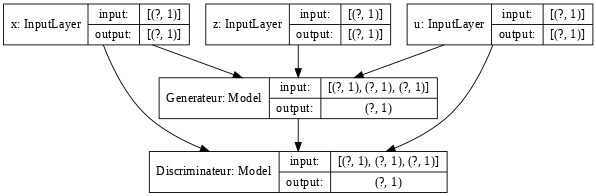

In [ ]:
tf.keras.utils.plot_model(gan_u, show_shapes=True, dpi=64,to_file='./gan.png')

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def minimax_loss (x,z):
  real_loss = cross_entropy(tf.ones_like(x), x)
  fake_loss =cross_entropy(tf.zeros_like(z), z)
  return 0.5*(real_loss+fake_loss)
  
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
minimax_loss_metrics = tf.keras.metrics.Mean(name='minimax_loss_loss')
generateur_loss_metrics = tf.keras.metrics.Mean(name='generateur_loss_loss')

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4) 
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
@tf.function
def train_step(h):

    with   tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape :
            
            
            u_t_k = generator([h[0],h[1],h[2]], training=True)
            fake_output = discriminator([h[0],h[1],u_t_k])
            real_output = discriminator([h[0],h[1],h[3]])
            
            gen_loss = generator_loss(fake_output)
            disc_loss = minimax_loss(real_output, fake_output)
                
            
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator,generator.trainable_variables) )
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,discriminator.trainable_variables) )

    minimax_loss_metrics(disc_loss)
    generateur_loss_metrics(gen_loss)

In [ ]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()
        for h in dataset:
                train_step(h)    
                
        loss_history.append((minimax_loss_metrics.result().numpy(),generateur_loss_metrics.result().numpy()))
        print ("minimax_loss:",minimax_loss_metrics.result().numpy(),"generateur_loss:",generateur_loss_metrics.result().numpy())
        minimax_loss_metrics.reset_states()
        generateur_loss_metrics.reset_states()

In [ ]:
epochs = 100
loss_history=[]

In [ ]:
X = np.asarray(X)
U = np.asarray(U)

In [ ]:
buffer_size , batch_size = X.shape[0] , 8

In [ ]:
import time

epoch = 100

for _ in range(epoch):
  start1 = time.time()
  for k in range(36) :
    start2 = time.time()
    X_k_1 = np.asarray(X)[:,k].reshape(-1,1)
    U_k_1 = np.asarray(U)[:,k].reshape(-1,1)
    U_k = np.roll(U_k_1,1,axis=-1)
    Z_k_1 = z[:,k].reshape(-1,1)

    dataset = tf.data.Dataset.from_tensor_slices((X_k_1,U_k_1,Z_k_1,U_k)).shuffle(buffer_size).batch(batch_size)

    train(dataset,epochs)
  print ('Time for one time series {} is {} sec'.format(k + 1, time.time()-start2))
  print ('Time for one epoch {} is {} sec'.format(epoch + 1, time.time()-start1))  
  
  
  

minimax_loss: 0.50796586 generateur_loss: 0.6876273
minimax_loss: 0.5076946 generateur_loss: 0.687932
minimax_loss: 0.5078415 generateur_loss: 0.6878096
minimax_loss: 0.5080436 generateur_loss: 0.68749917
minimax_loss: 0.50763977 generateur_loss: 0.6880019
minimax_loss: 0.50753564 generateur_loss: 0.6881384
minimax_loss: 0.5080951 generateur_loss: 0.6875
minimax_loss: 0.50745493 generateur_loss: 0.688212
minimax_loss: 0.5069617 generateur_loss: 0.688779
minimax_loss: 0.50703186 generateur_loss: 0.6887265
minimax_loss: 0.5071335 generateur_loss: 0.6885861
minimax_loss: 0.5067495 generateur_loss: 0.68907243
minimax_loss: 0.5071031 generateur_loss: 0.688636
minimax_loss: 0.5071295 generateur_loss: 0.6886219
minimax_loss: 0.50668633 generateur_loss: 0.6891352
minimax_loss: 0.5068369 generateur_loss: 0.68893754
minimax_loss: 0.5074015 generateur_loss: 0.6882826
minimax_loss: 0.5071949 generateur_loss: 0.688546
minimax_loss: 0.5071036 generateur_loss: 0.68861777
minimax_loss: 0.50672483 gene

KeyboardInterrupt: ignored

In [ ]:
generated = []
for k in range(36):
  X_k_1 = np.asarray(X)[:,k].reshape(-1,1)
  U_k_1 = np.asarray(U)[:,k].reshape(-1,1)
  U_k = np.roll(U_k_1,1,axis=-1)
  Z_k_1 = z[:,k].reshape(-1,1)
  u_t_k = generator([X_k_1,U_k_1,U_k], training=False).numpy()
  generated.append(u_t_k)

generated = np.asarray(generated).reshape(X.shape) 

**Evaluation**

**pdf(U_truth) vs pdf(U_simulé)** 

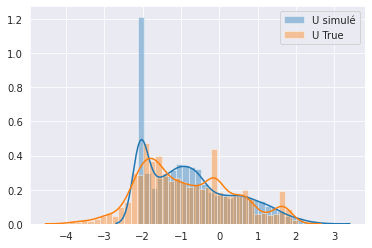

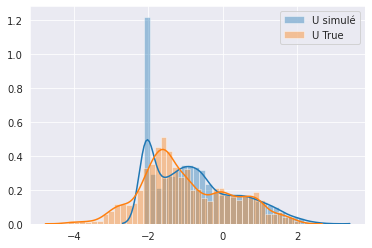

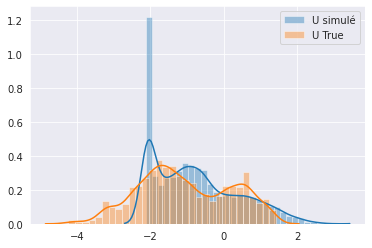

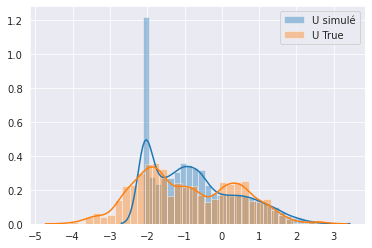

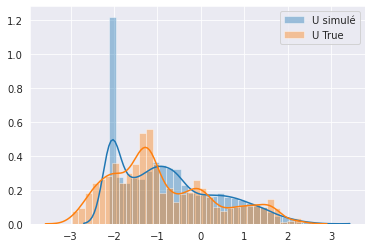

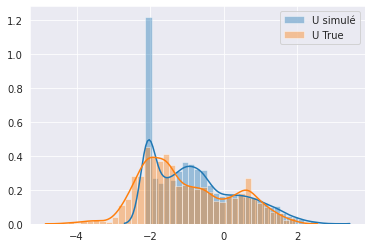

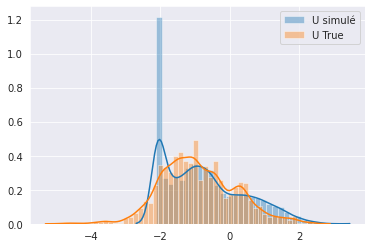

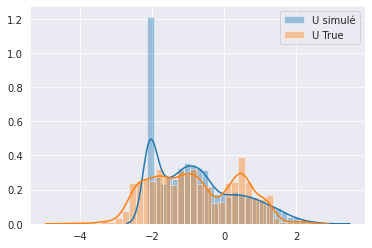

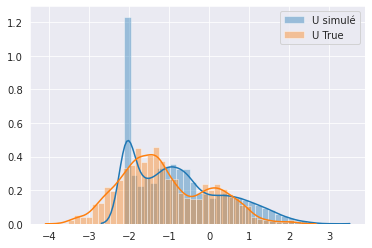

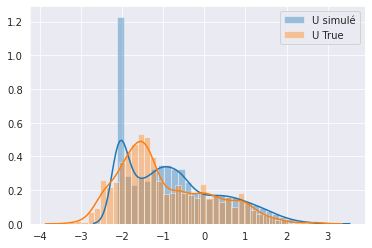

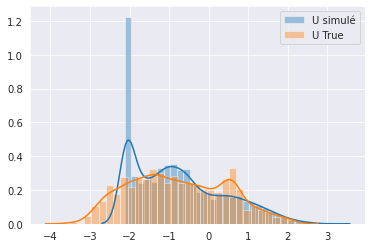

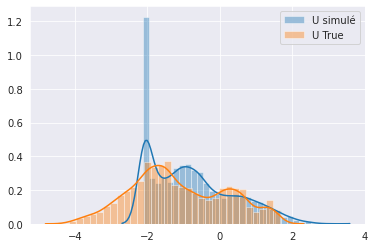

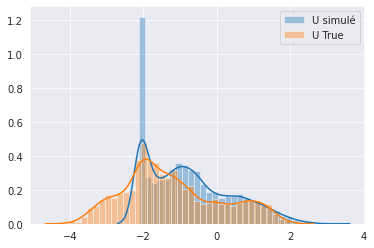

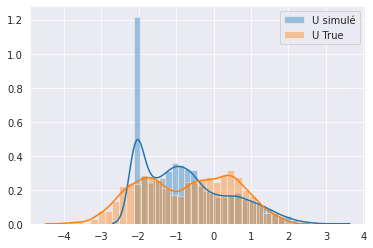

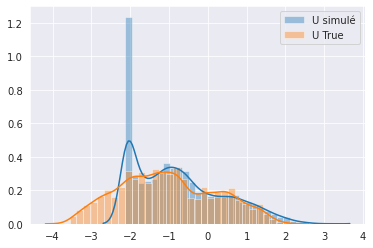

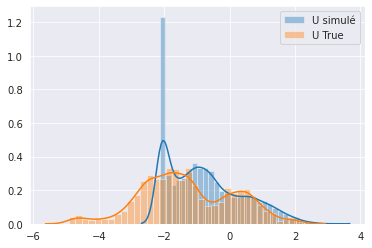

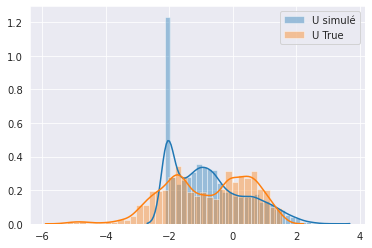

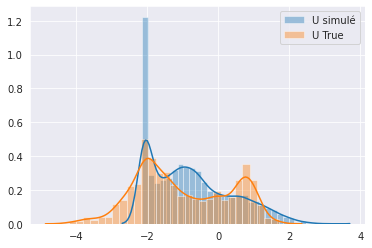

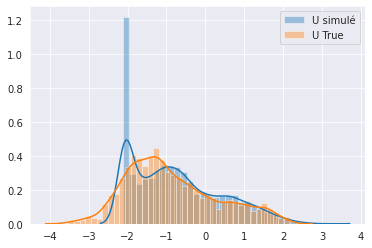

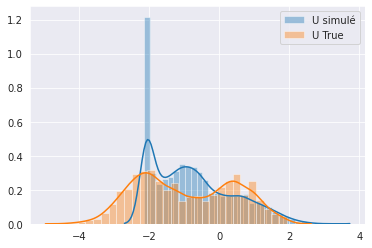

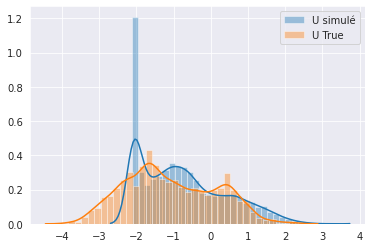

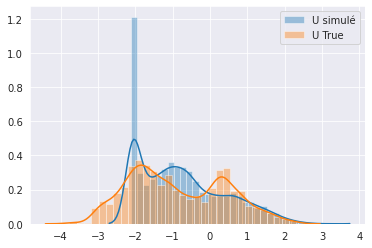

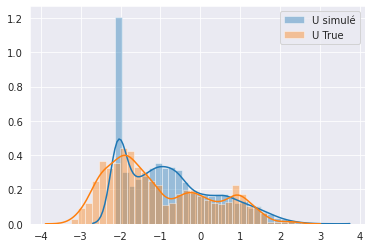

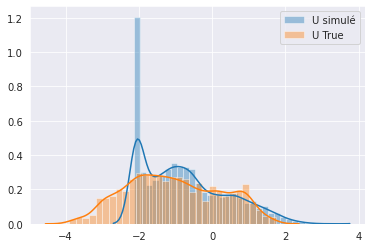

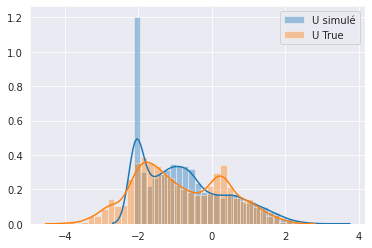

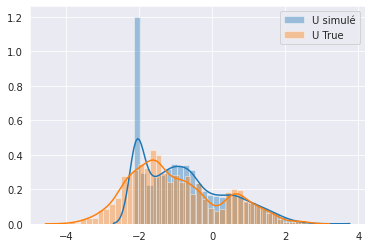

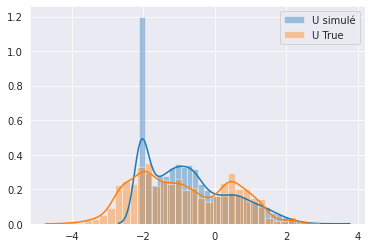

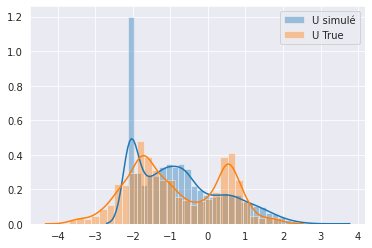

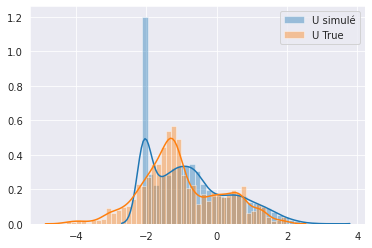

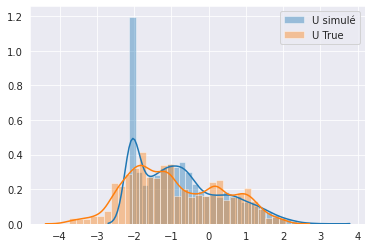

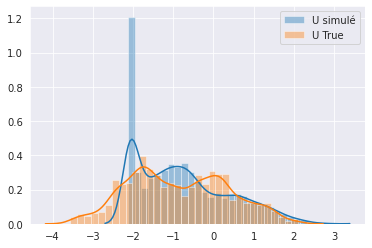

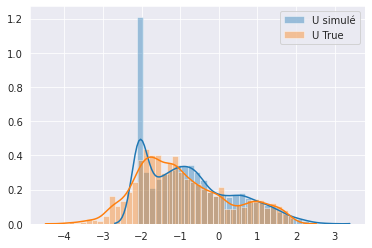

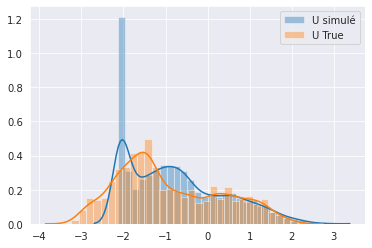

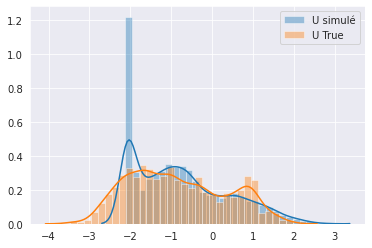

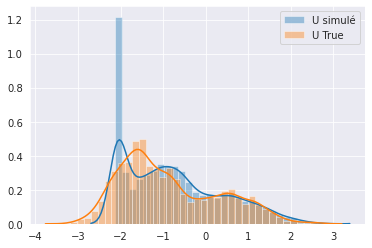

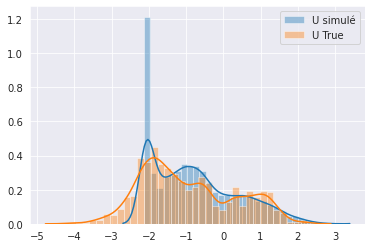

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for k in range(36):
  sns.distplot(generated[:,k],label='U simulé')
  sns.distplot(U[:,k],label='U True')
  plt.legend(loc='upper right')
  plt.savefig('./U-U_simulé-hists'+str(k)+'.jpeg', dpi=200)
  plt.show()
  

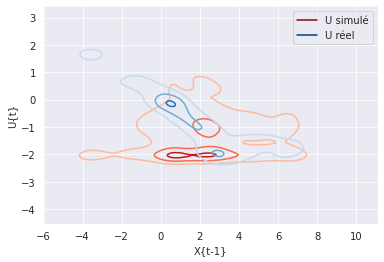

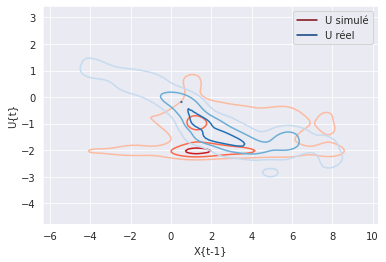

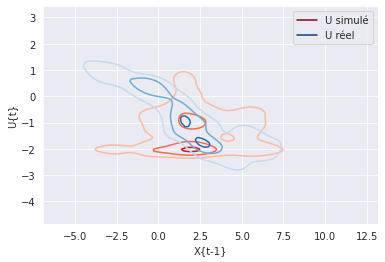

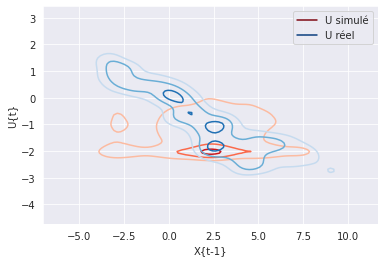

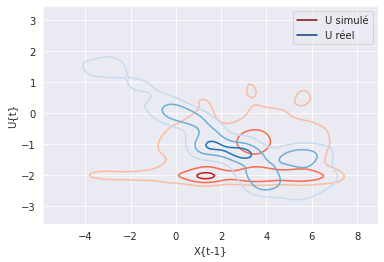

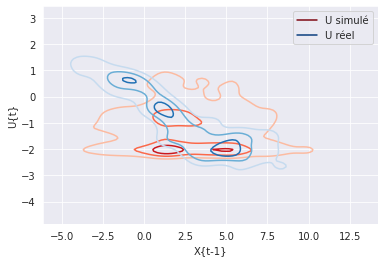

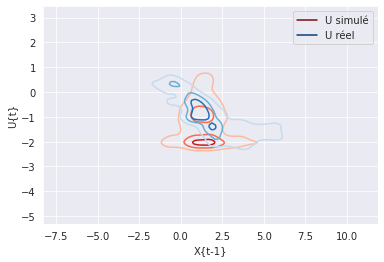

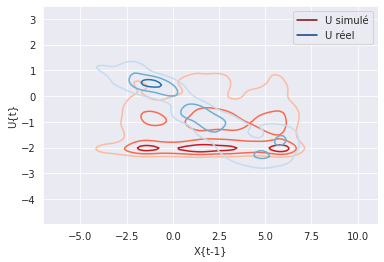

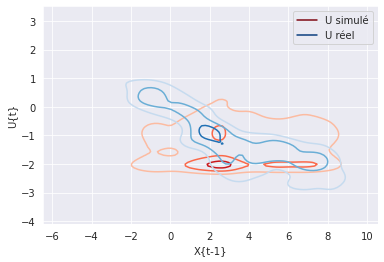

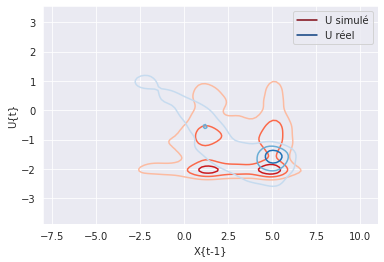

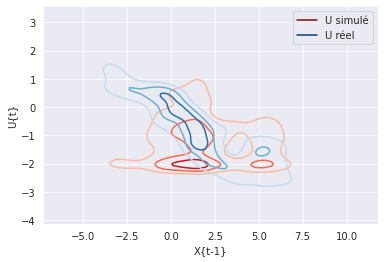

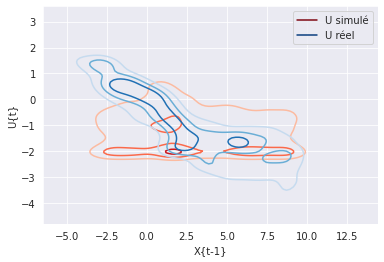

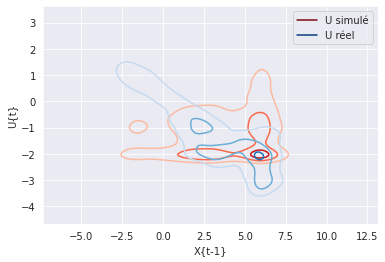

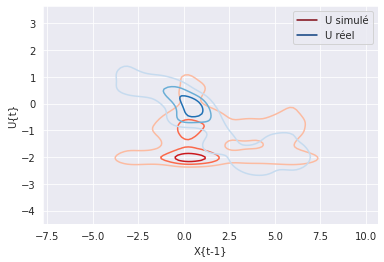

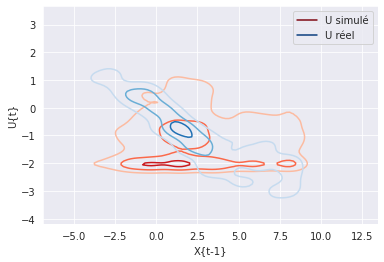

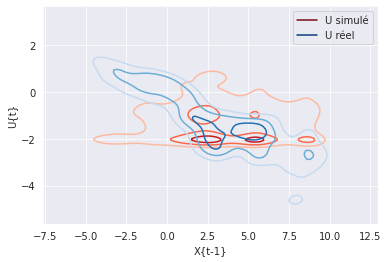

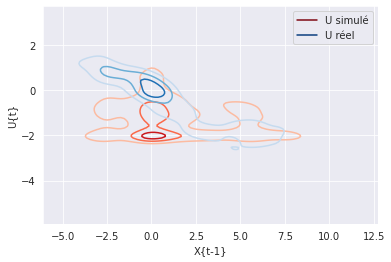

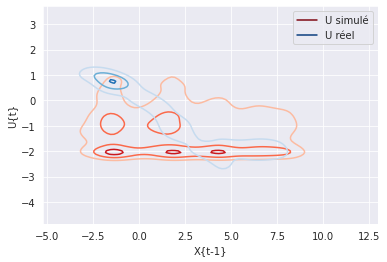

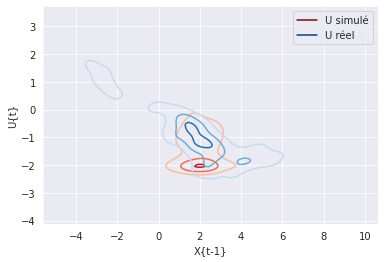

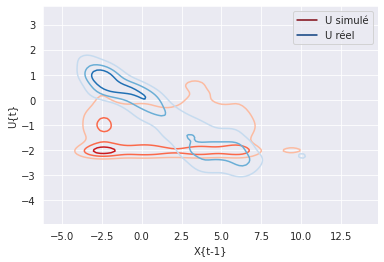

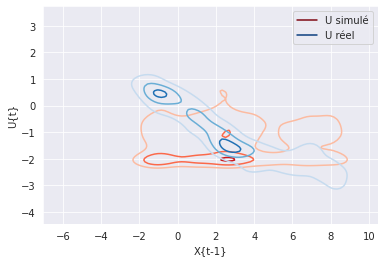

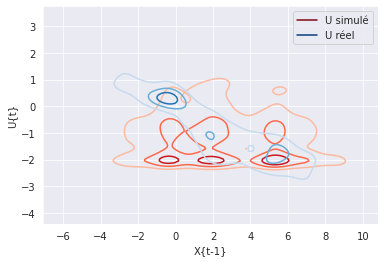

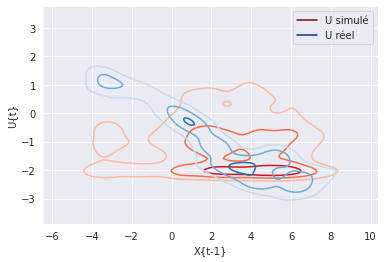

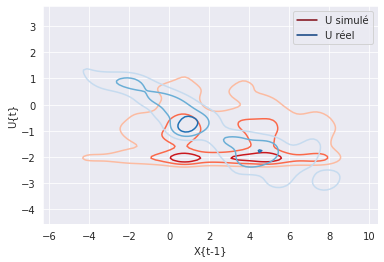

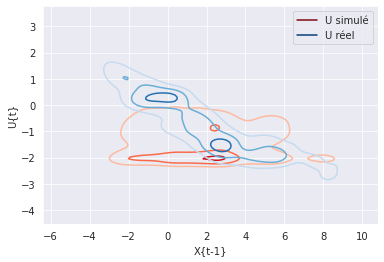

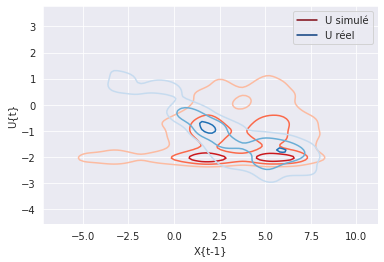

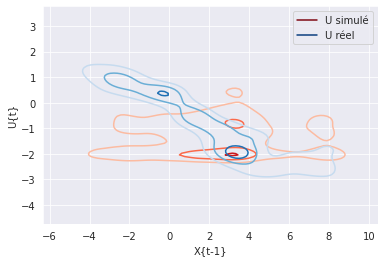

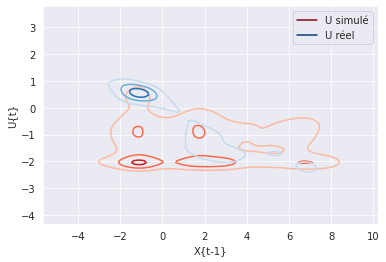

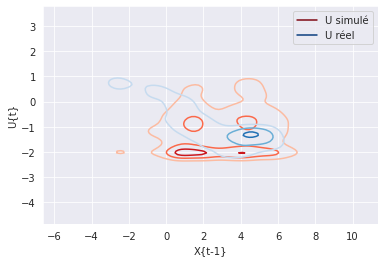

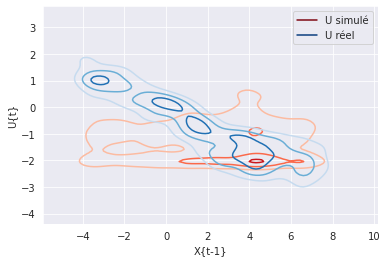

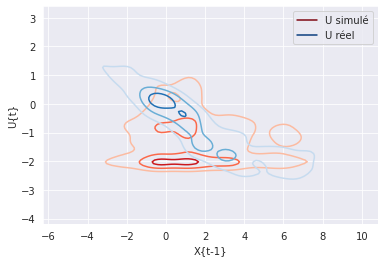

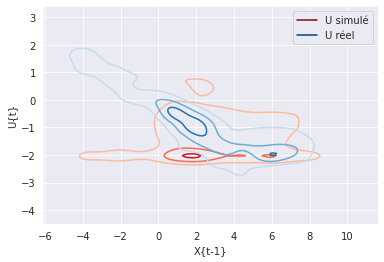

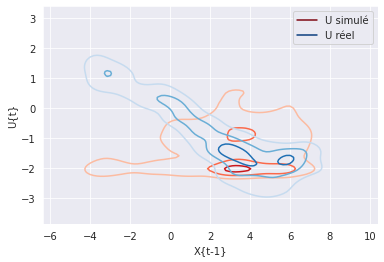

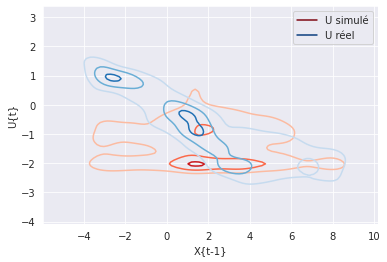

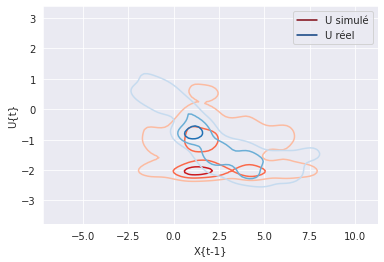

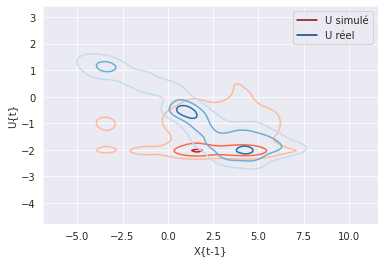

In [ ]:
for k in range(36): 
  
  sns.kdeplot(X[:,k],generated[:,k],n_levels=3, cmap='Reds',label='U simulé')
  sns.kdeplot(X[:,k],U[:,k],n_levels=3, cmap='Blues',label='U réel')
  plt.xlabel('X{t-1}')
  plt.ylabel('U{t}')
  plt.legend()
  plt.savefig('./visualization'+str(k)+'.jpeg', dpi=200)
  plt.show()
  

### **dt = 0.01**

In [ ]:
l96_two = L96TwoLevel(save_dt=0.01, X_init=initX, Y_init=initY)
l96_two.iterate(10)
h2 = l96_two.history
U = h2.B
X = h2.X

In [ ]:
generator = generateur(0.001)
discriminator = discriminateur(0.001)

In [ ]:
@tf.function
def train_step(h):

    with   tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape :
            
            
            u_t_k = generator([h[0],h[1],h[2]], training=True)
            fake_output = discriminator([h[0],h[1],u_t_k])
            real_output = discriminator([h[0],h[1],h[3]])
            
            gen_loss = generator_loss(fake_output)
            disc_loss = minimax_loss(real_output, fake_output)
                
            
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator,generator.trainable_variables) )
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,discriminator.trainable_variables) )

    minimax_loss_metrics(disc_loss)
    generateur_loss_metrics(gen_loss)

In [ ]:
import time

epoch = 100
z = np.random.normal(0,1,size=X.shape)
for _ in range(epoch):
  start1 = time.time()
  for k in range(36) :
    start2 = time.time()
    X_k_1 = np.asarray(X)[:,k].reshape(-1,1)
    U_k_1 = np.asarray(U)[:,k].reshape(-1,1)
    U_k = np.roll(U_k_1,1,axis=-1)
    Z_k_1 = z[:,k].reshape(-1,1)

    dataset = tf.data.Dataset.from_tensor_slices((X_k_1,U_k_1,Z_k_1,U_k)).shuffle(buffer_size).batch(batch_size)

    train(dataset,epochs)
  print ('Time for one time series {} is {} sec'.format(k + 1, time.time()-start2))
  print ('Time for one epoch {} is {} sec'.format(epoch + 1, time.time()-start1))  

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
minimax_loss: 0.5044034 generateur_loss: 0.6918307
minimax_loss: 0.505217 generateur_loss: 0.69075334
minimax_loss: 0.5048185 generateur_loss: 0.69128776
minimax_loss: 0.5047014 generateur_loss: 0.6914206
minimax_loss: 0.50503916 generateur_loss: 0.69094163
minimax_loss: 0.50479776 generateur_loss: 0.6913601
minimax_loss: 0.5048828 generateur_loss: 0.6912602
minimax_loss: 0.50407153 generateur_loss: 0.69221854
minimax_loss: 0.5047126 generateur_loss: 0.6914321
minimax_loss: 0.5042277 generateur_loss: 0.6918909
minimax_loss: 0.5047303 generateur_loss: 0.69131637
minimax_loss: 0.50417846 generateur_loss: 0.69199467
minimax_loss: 0.5050741 generateur_loss: 0.69089377
minimax_loss: 0.50435215 generateur_loss: 0.6918105
minimax_loss: 0.5053798 generateur_loss: 0.6905665
minimax_loss: 0.505787 generateur_loss: 0.6901915
minimax_loss: 0.5045034 generateur_loss: 0.6915543
minimax_loss: 0.5053609 generateur_loss: 0.69

KeyboardInterrupt: ignored

In [ ]:
generated = []
for k in range(36):
  X_k_1 = np.asarray(X)[:,k].reshape(-1,1)
  U_k_1 = np.asarray(U)[:,k].reshape(-1,1)
  U_k = np.roll(U_k_1,1,axis=-1)
  Z_k_1 = z[:,k].reshape(-1,1)
  u_t_k = generator([X_k_1,U_k_1,U_k], training=False).numpy()
  generated.append(u_t_k)

generated = np.asarray(generated).reshape(X.shape) 

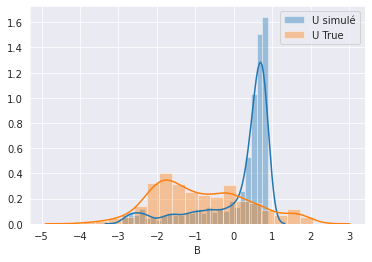

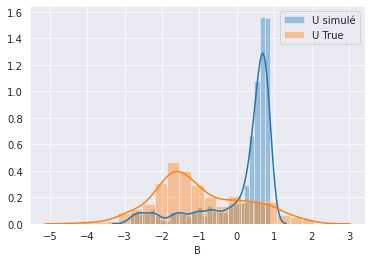

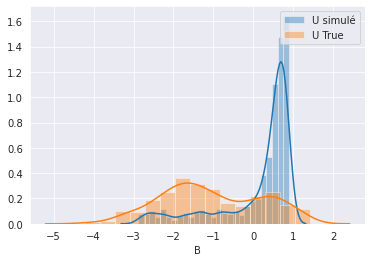

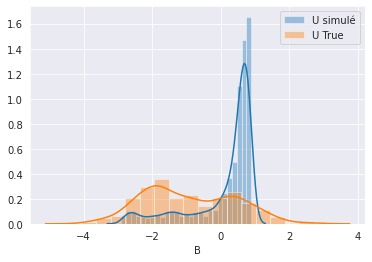

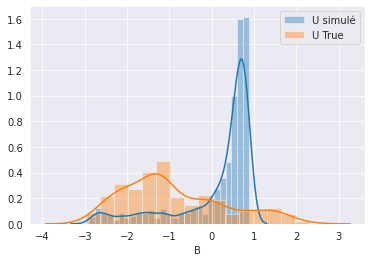

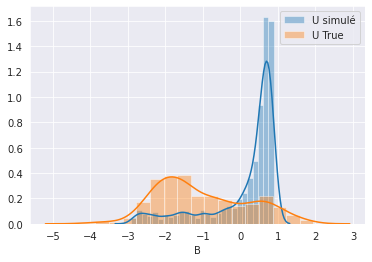

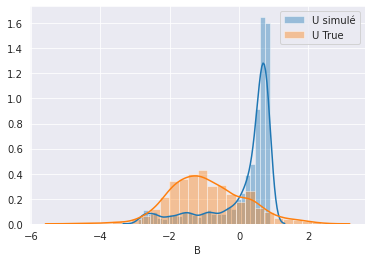

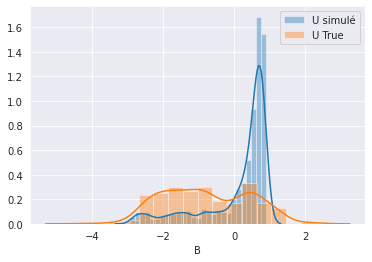

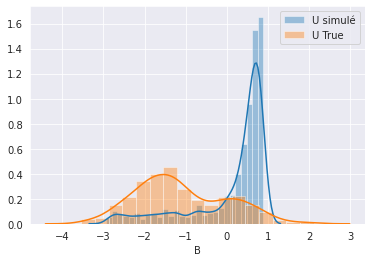

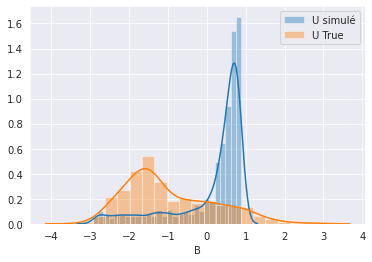

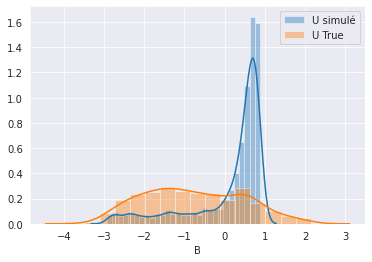

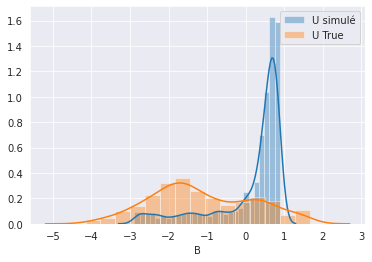

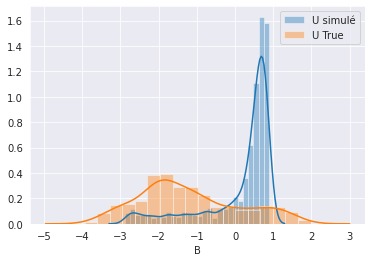

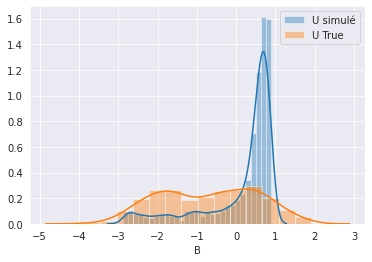

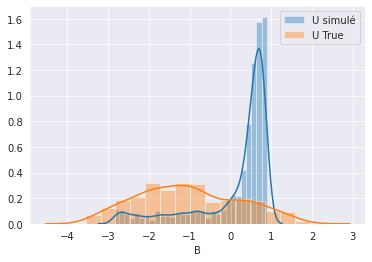

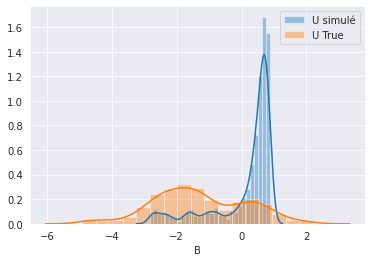

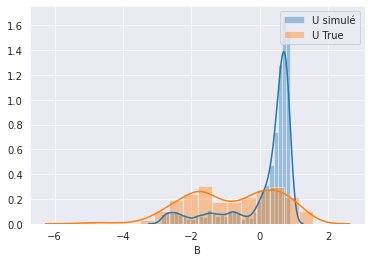

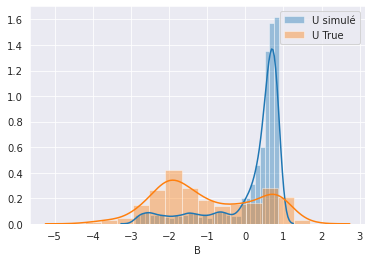

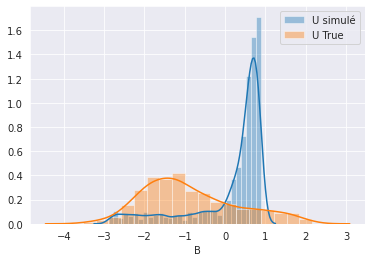

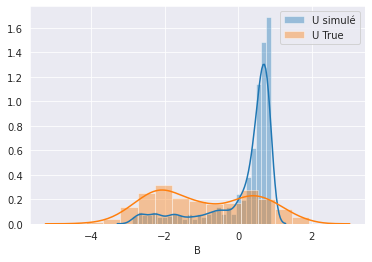

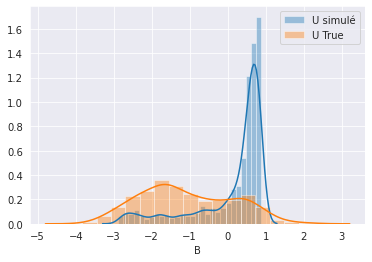

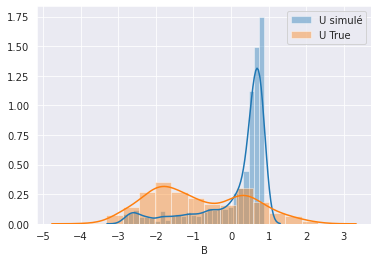

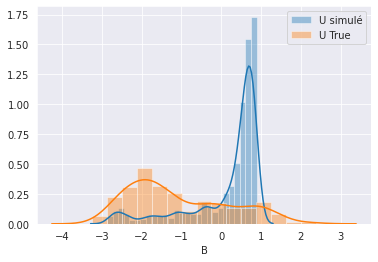

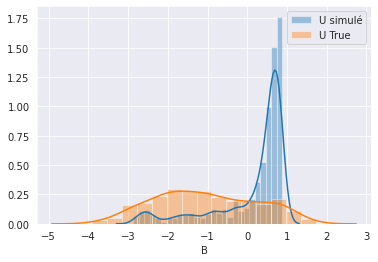

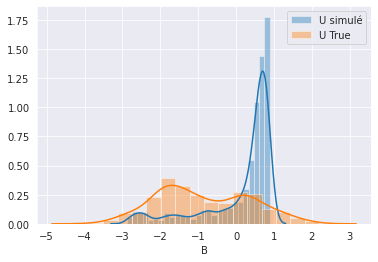

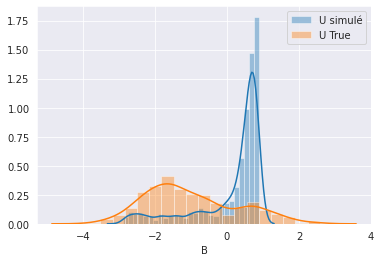

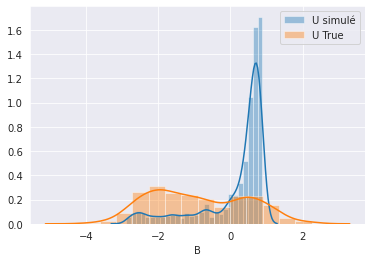

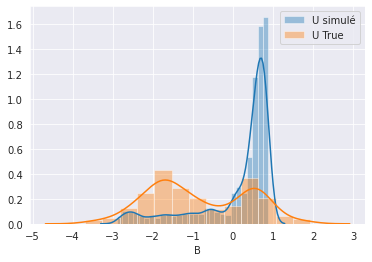

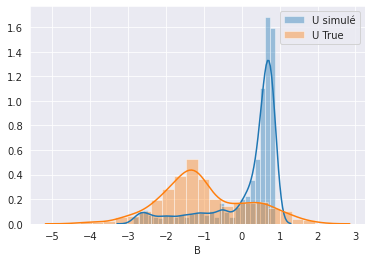

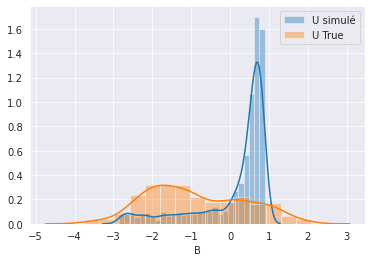

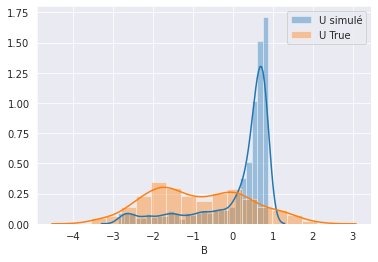

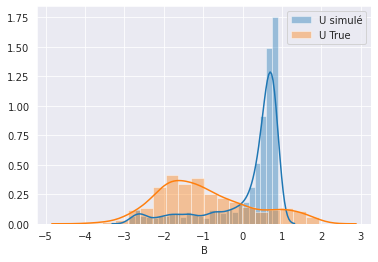

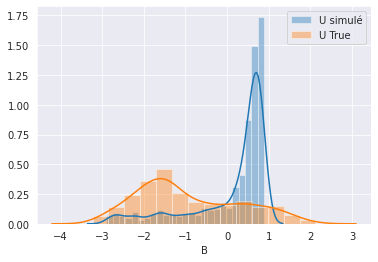

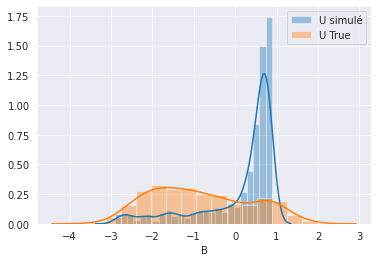

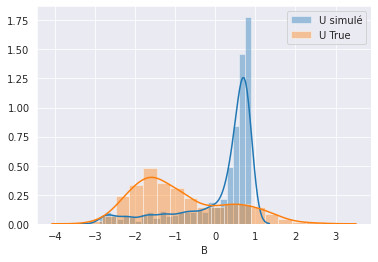

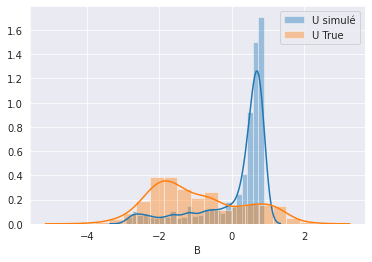

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for k in range(36):
  sns.distplot(generated[:,k],label='U simulé')
  sns.distplot(U[:,k],label='U True')
  plt.legend(loc='upper right')
  plt.savefig('./U-U_simulé-hists'+str(k)+'.jpeg', dpi=200)
  plt.show()
  

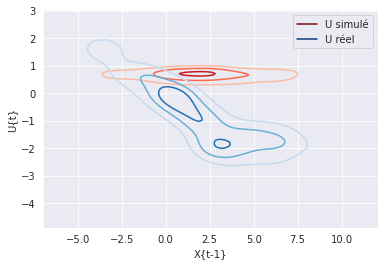

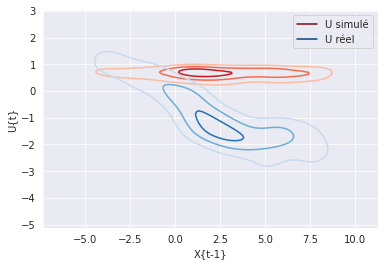

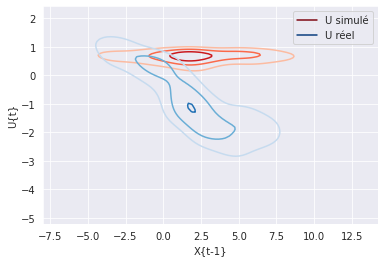

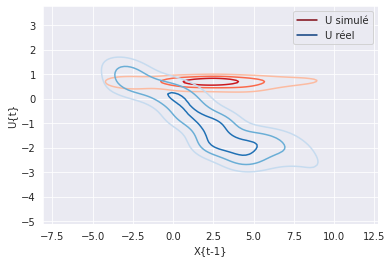

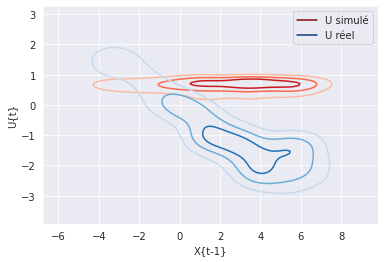

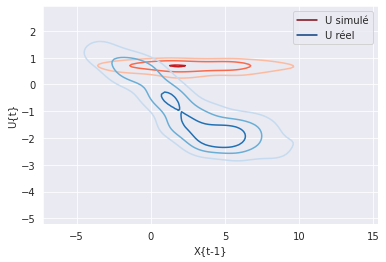

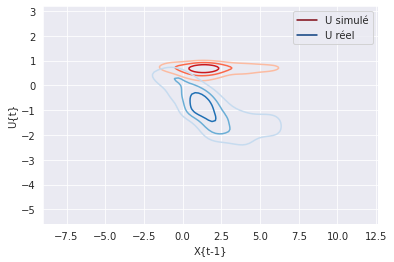

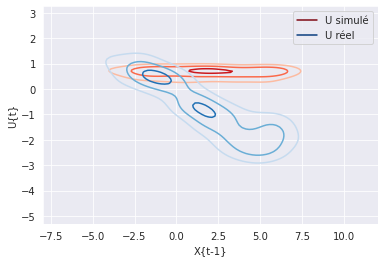

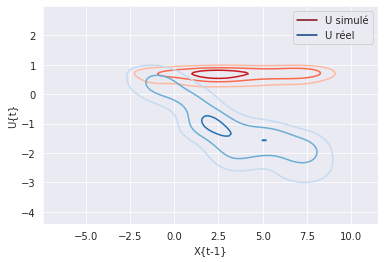

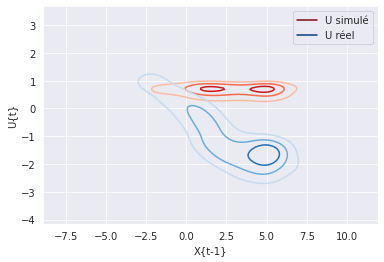

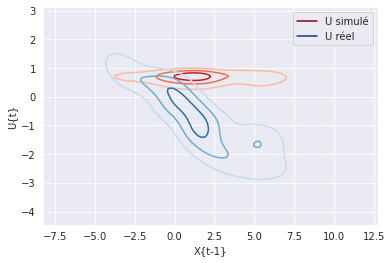

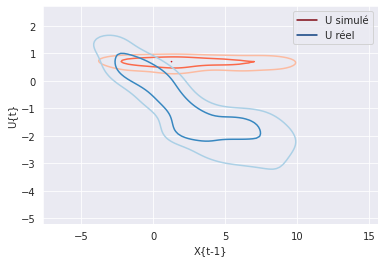

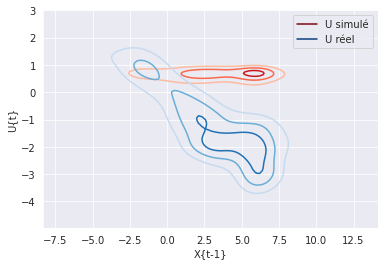

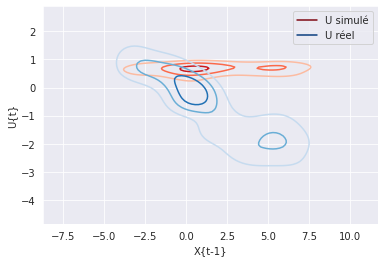

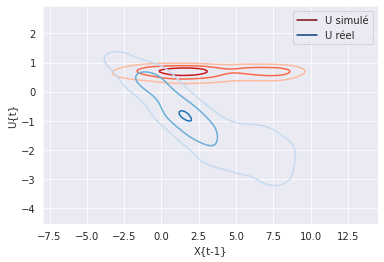

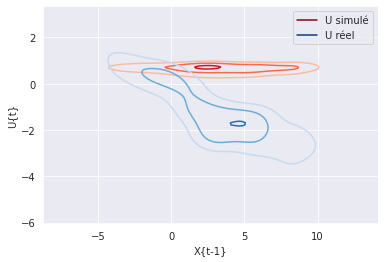

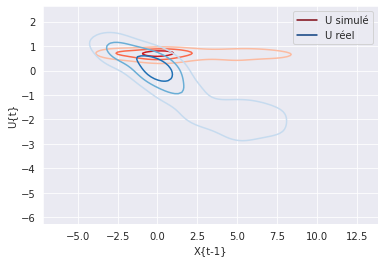

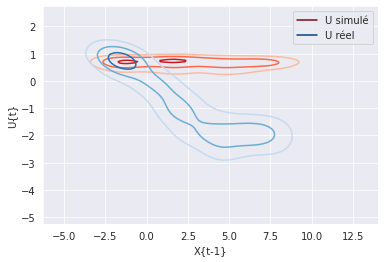

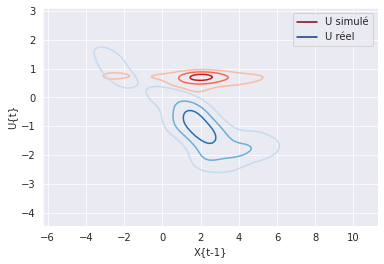

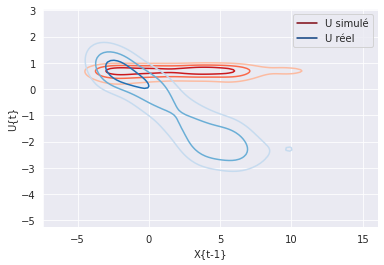

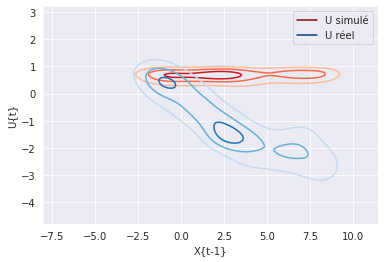

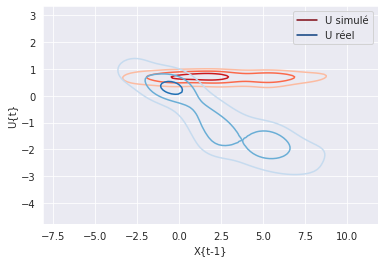

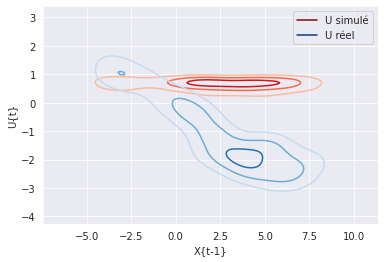

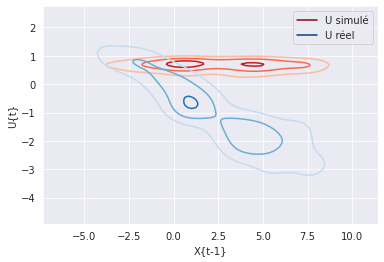

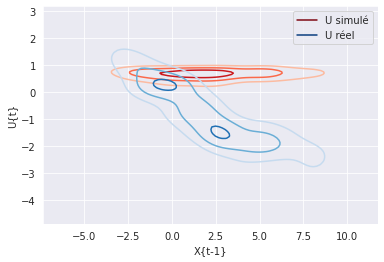

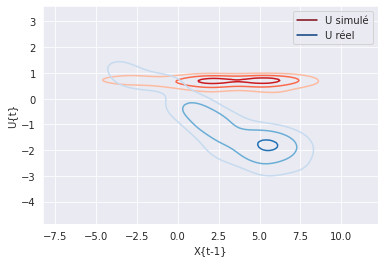

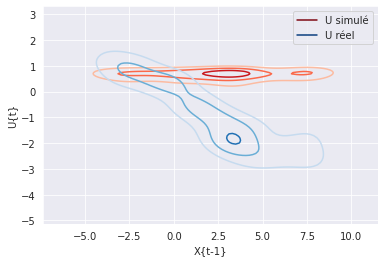

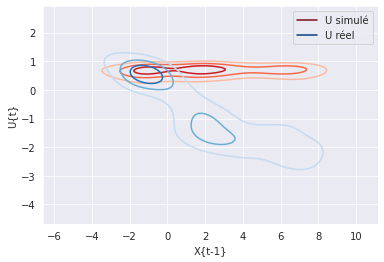

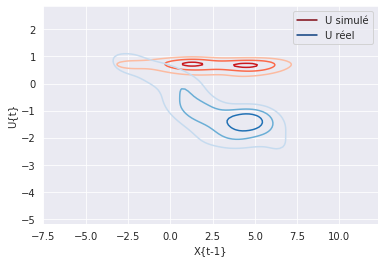

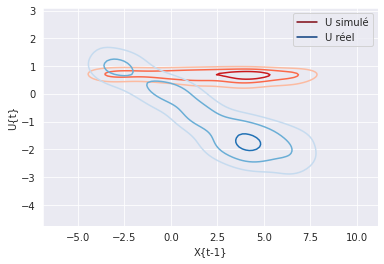

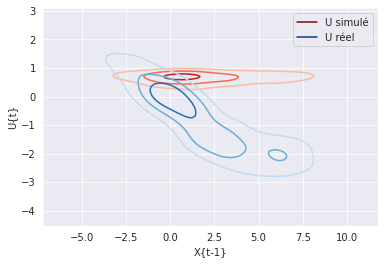

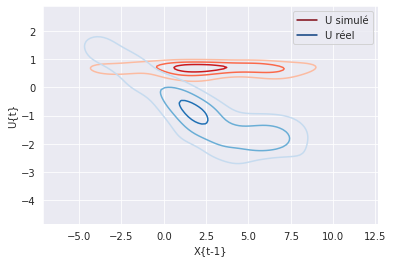

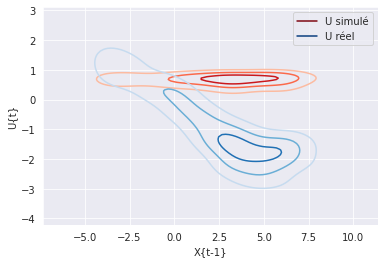

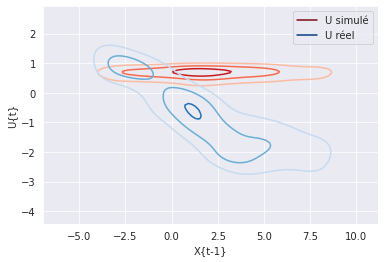

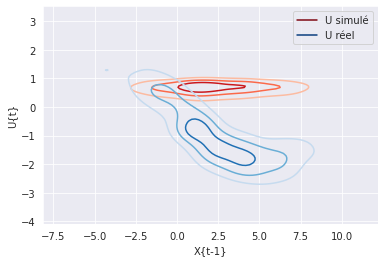

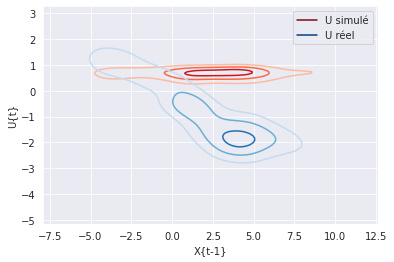

In [ ]:
for k in range(36): 
  
  sns.kdeplot(X[:,k],generated[:,k],n_levels=3, cmap='Reds',label='U simulé')
  sns.kdeplot(X[:,k],U[:,k],n_levels=3, cmap='Blues',label='U réel')
  plt.xlabel('X{t-1}')
  plt.ylabel('U{t}')
  plt.legend()
  plt.savefig('./visualization'+str(k)+'.jpeg', dpi=200)
  plt.show()

### **dt = 0.1**

In [ ]:
l96_two = L96TwoLevel(save_dt=0.1, X_init=initX, Y_init=initY)
l96_two.iterate(10)
h2 = l96_two.history
U = h2.B
X = h2.X

In [ ]:
generator = generateur(0.001)
discriminator = discriminateur(0.001)

In [ ]:
@tf.function
def train_step(h):

    with   tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape :
            
            
            u_t_k = generator([h[0],h[1],h[2]], training=True)
            fake_output = discriminator([h[0],h[1],u_t_k])
            real_output = discriminator([h[0],h[1],h[3]])
            
            gen_loss = generator_loss(fake_output)
            disc_loss = minimax_loss(real_output, fake_output)
                
            
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator,generator.trainable_variables) )
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,discriminator.trainable_variables) )

    minimax_loss_metrics(disc_loss)
    generateur_loss_metrics(gen_loss)

In [ ]:
import time
z = np.random.normal(0,1,size=X.shape)  
epoch = 100

for _ in range(epoch):
  start1 = time.time()
  for k in range(36) :
    start2 = time.time()
    X_k_1 = np.asarray(X)[:,k].reshape(-1,1)
    U_k_1 = np.asarray(U)[:,k].reshape(-1,1)
    U_k = np.roll(U_k_1,1,axis=-1)
    Z_k_1 = z[:,k].reshape(-1,1)

    dataset = tf.data.Dataset.from_tensor_slices((X_k_1,U_k_1,Z_k_1,U_k)).shuffle(buffer_size).batch(batch_size)

    train(dataset,epochs)
  print ('Time for one time series {} is {} sec'.format(k + 1, time.time()-start2))
  print ('Time for one epoch {} is {} sec'.format(epoch + 1, time.time()-start1))  

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
minimax_loss: 0.514645 generateur_loss: 0.6797874
minimax_loss: 0.510214 generateur_loss: 0.6854503
minimax_loss: 0.5140739 generateur_loss: 0.6808617
minimax_loss: 0.5263579 generateur_loss: 0.6645793
minimax_loss: 0.533025 generateur_loss: 0.6572686
minimax_loss: 0.5110983 generateur_loss: 0.6854534
minimax_loss: 0.5101413 generateur_loss: 0.6862862
minimax_loss: 0.52557075 generateur_loss: 0.66511214
minimax_loss: 0.51466745 generateur_loss: 0.681422
minimax_loss: 0.51806116 generateur_loss: 0.677173
minimax_loss: 0.5135427 generateur_loss: 0.68083835
minimax_loss: 0.51574796 generateur_loss: 0.67903095
minimax_loss: 0.5052928 generateur_loss: 0.69256884
minimax_loss: 0.51378673 generateur_loss: 0.6812384
minimax_loss: 0.51152027 generateur_loss: 0.6837048
minimax_loss: 0.511249 generateur_loss: 0.685944
minimax_loss: 0.51818234 generateur_loss: 0.67652005
minimax_loss: 0.52262694 generateur_loss: 0.669935

KeyboardInterrupt: ignored

In [ ]:
generated = []
for k in range(36):
  X_k_1 = np.asarray(X)[:,k].reshape(-1,1)
  U_k_1 = np.asarray(U)[:,k].reshape(-1,1)
  U_k = np.roll(U_k_1,1,axis=-1)
  Z_k_1 = z[:,k].reshape(-1,1)
  u_t_k = generator([X_k_1,U_k_1,U_k], training=False).numpy()
  generated.append(u_t_k)

generated = np.asarray(generated).reshape(X.shape) 

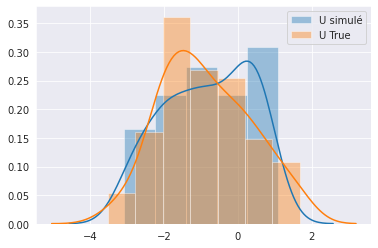

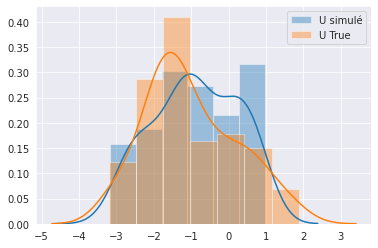

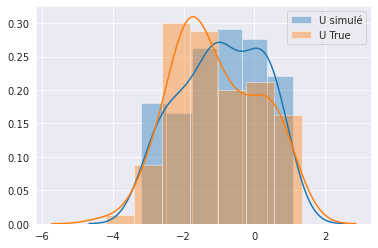

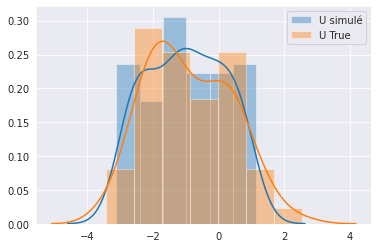

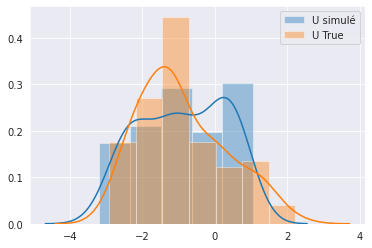

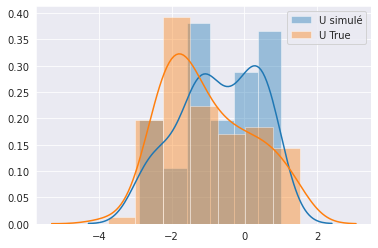

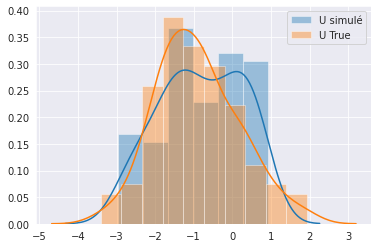

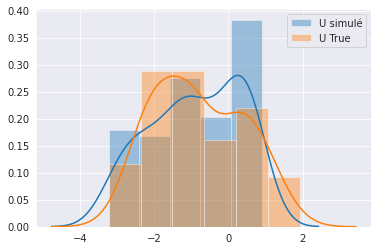

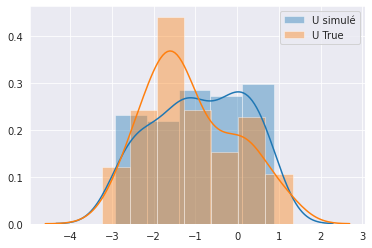

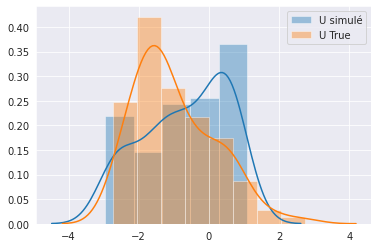

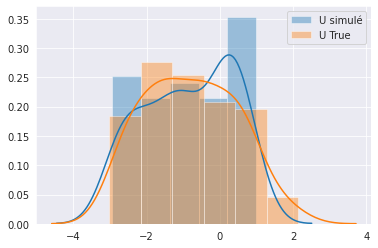

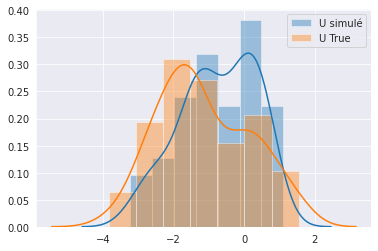

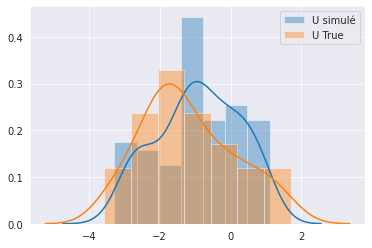

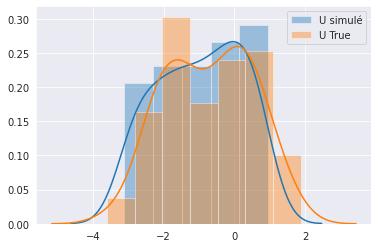

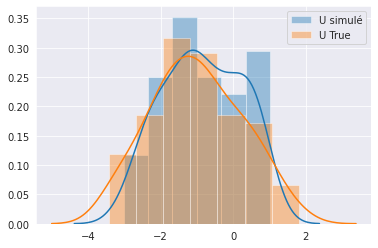

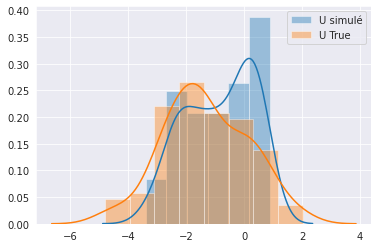

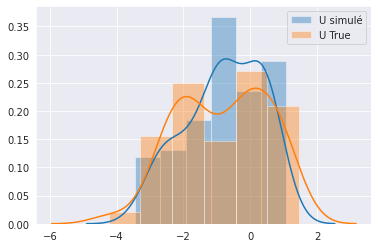

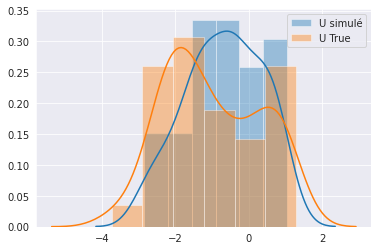

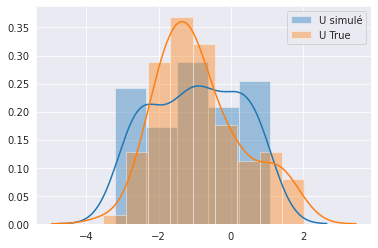

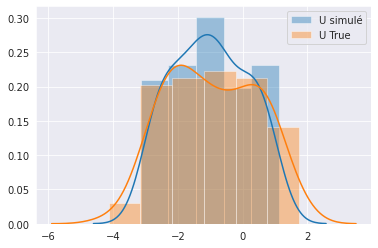

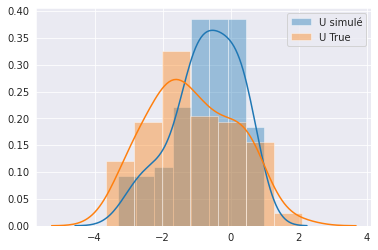

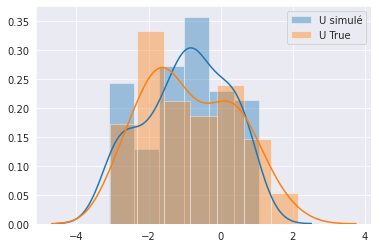

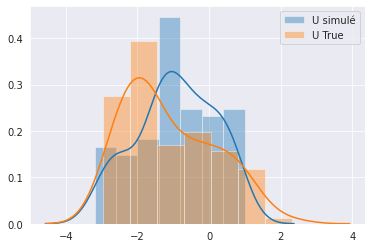

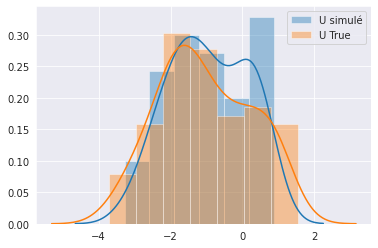

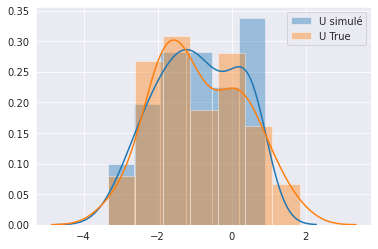

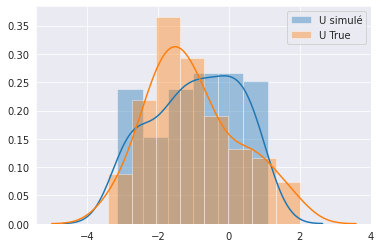

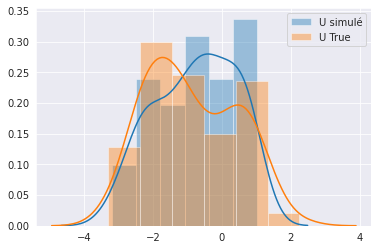

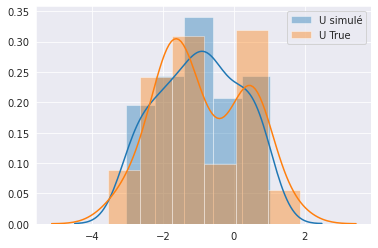

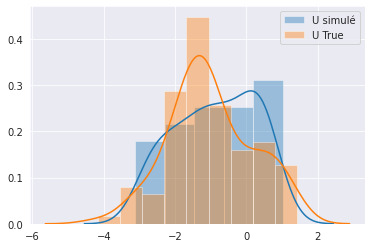

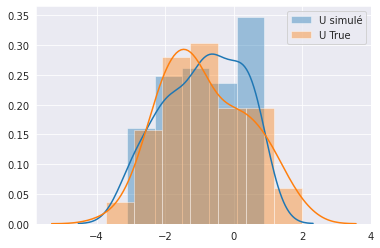

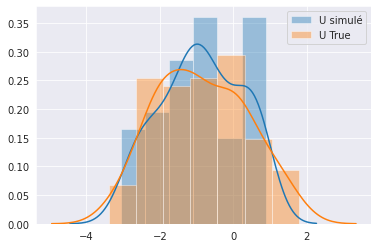

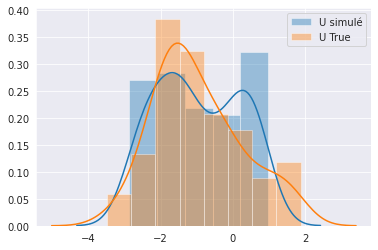

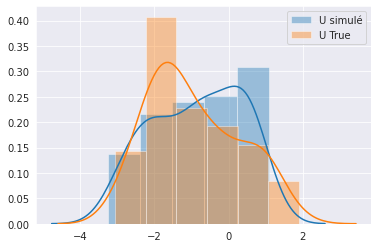

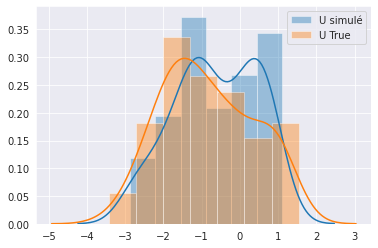

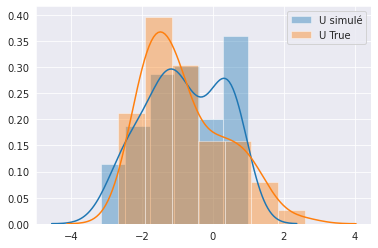

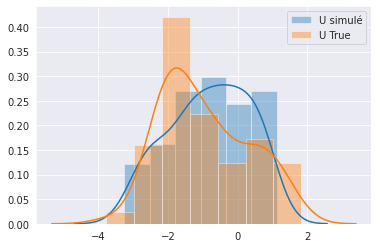

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for k in range(36):
  sns.distplot(generated[:,k],label='U simulé')
  sns.distplot(U[:,k],label='U True')
  plt.legend(loc='upper right')
  plt.savefig('./U-U_simulé-hists'+str(k)+'.jpeg', dpi=200)
  plt.show()
  

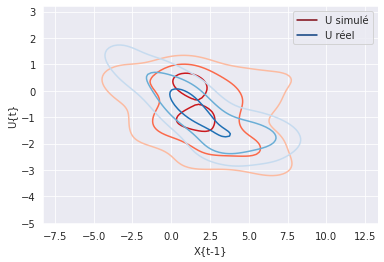

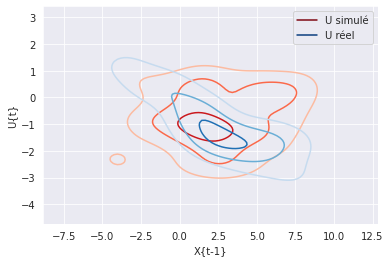

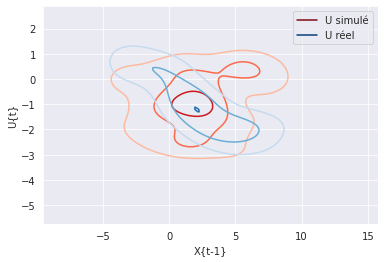

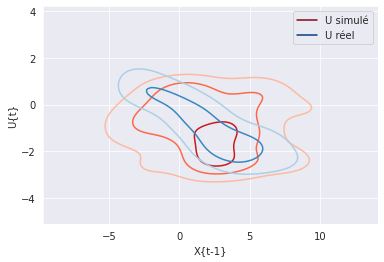

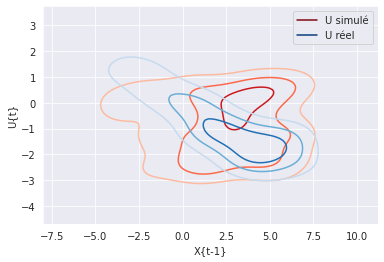

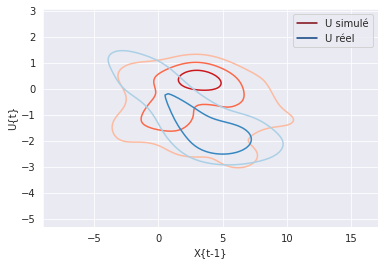

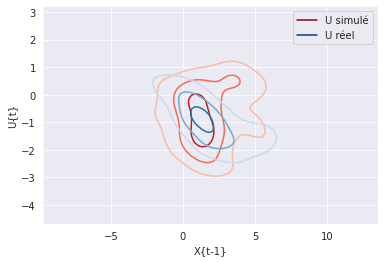

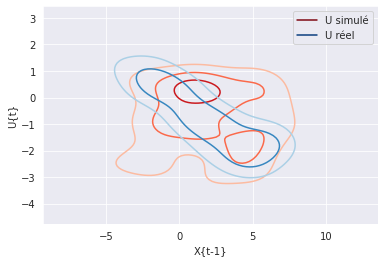

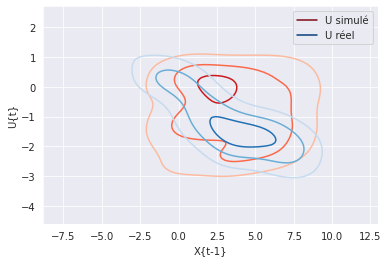

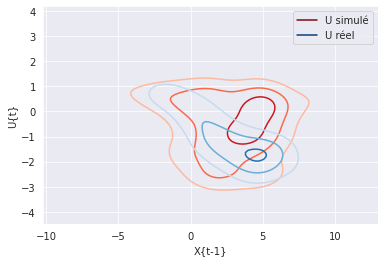

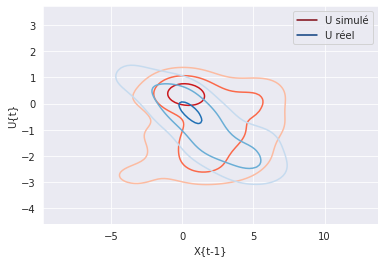

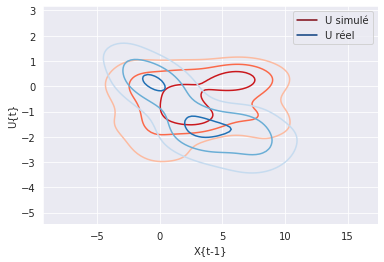

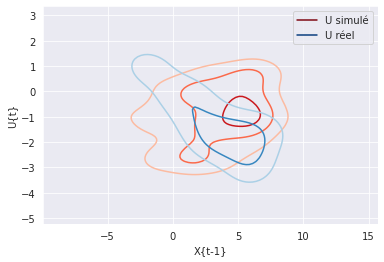

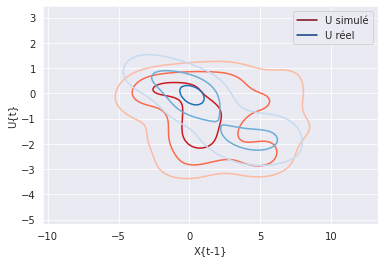

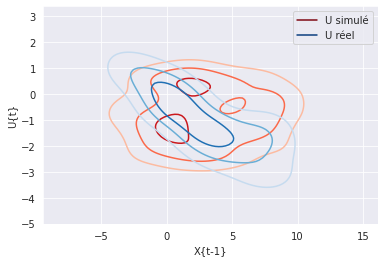

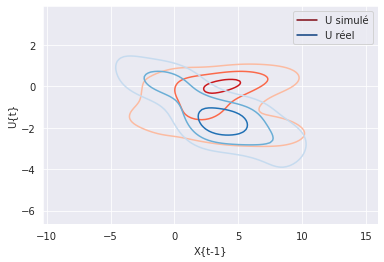

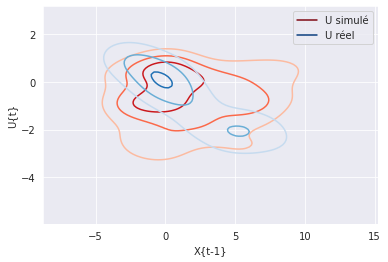

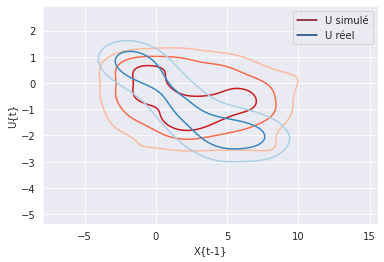

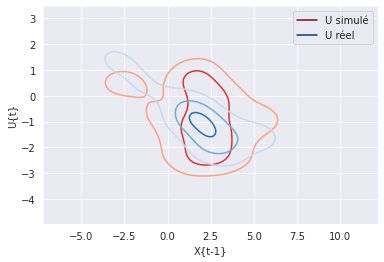

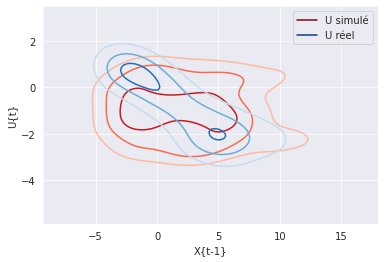

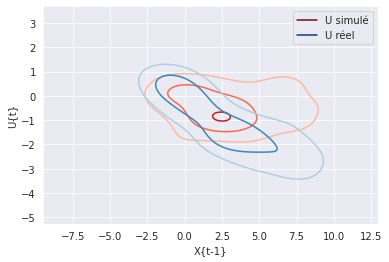

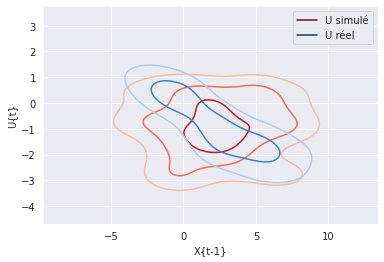

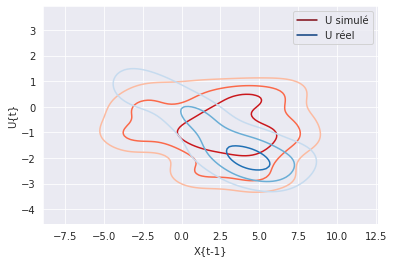

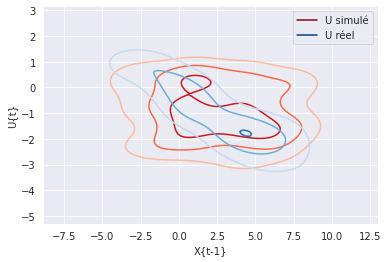

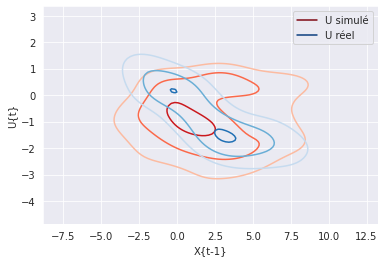

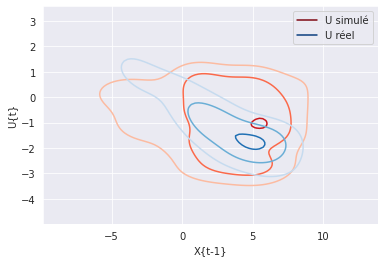

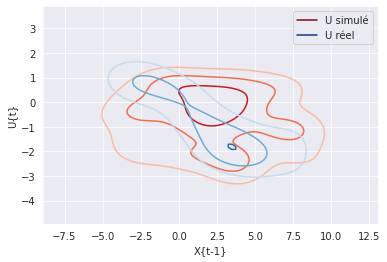

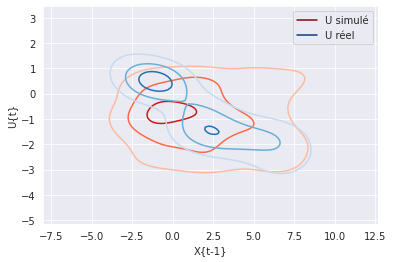

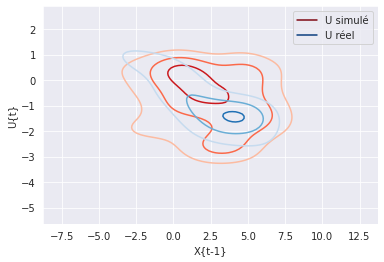

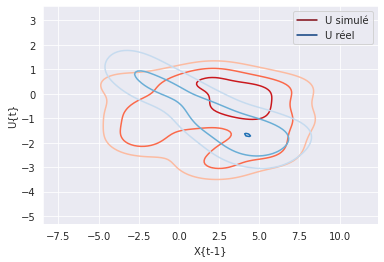

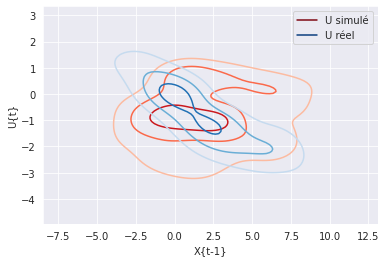

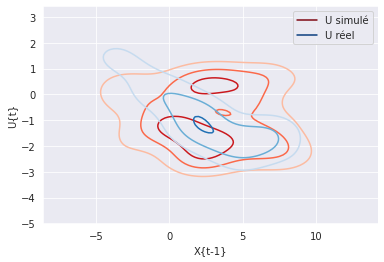

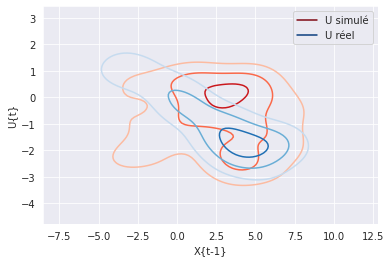

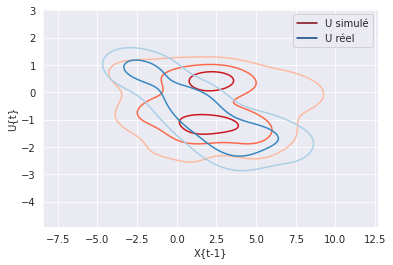

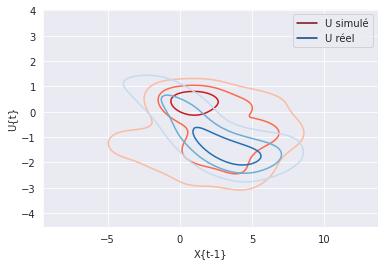

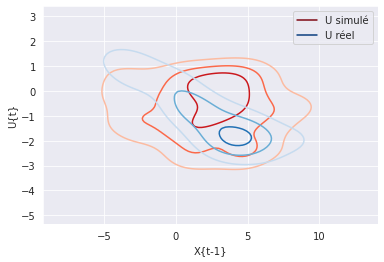

In [ ]:
for k in range(36): 
  
  sns.kdeplot(X[:,k],generated[:,k],n_levels=3, cmap='Reds',label='U simulé')
  sns.kdeplot(X[:,k],U[:,k],n_levels=3, cmap='Blues',label='U réel')
  plt.xlabel('X{t-1}')
  plt.ylabel('U{t}')
  plt.legend()
  plt.savefig('./visualization'+str(k)+'.jpeg', dpi=200)
  plt.show()
  

# Lorentz -96 - Linear - Ridge - Lasso - Regressions

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from L96regress import *
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model as skm
import seaborn as sns
import pickle
import pandas as pd

In [ ]:
# Load initial conditions for L96 model
initX, initY = np.load('./initX.npy'), np.load('./initY.npy')
np.random.seed(123)

**Truth Model**
$$\frac{dX_{k}}{dt} =  -X_{k-1}(X_{k-2}-X_{k+1}) - X_{k} + F -\frac{hc}{b} \sum_{j = J(k-1) + 1}^{kJ}Y_{j};  k = 1,...,K$$
$$\frac{dY_{j}}{dt} = -cbY_{j+1}(Y_{j+2}-Y_{j-1}) - cY_{j} + \frac{hc}{b}X_{int[(j-1)/J]+1}; j = 1,...,JK$$
**True sub-grid-scale tendency**
$$B(X,Y) =\frac{hc}{b} \sum_{j = J(k-1) + 1}^{kJ}Y_{j}$$

**Forecast Model**
$$\frac{dX_{k}^*}{dt} = -X_{k-1}^*(X_{k-2}^*-X_{k+1}^*) - X_{k}^* + F - B_{p}(X_{k}^*)$$

Where $X_{k}^*(t)$ is the forecast value of $X_{k}(t)$ and $B_{p}(X_{k}^*)$ is the parametrized sub-grid tendency. The parametrizations $B_{p}(X)$ approximate the true sub-grid tendencies:

$$B(X,Y) =\frac{hc}{b} \sum_{j = J(k-1) + 1}^{kJ}Y_{j}$$

which are estimated from the truth series as:
$$ B(t) = [-X_{k-1}(X_{k-2}-X_{k+1}) - X_{k} +F] - \frac{X_{k}(t+\Delta t) - X_{k}(t)}{\Delta t}$$

In [ ]:
# simulate data
simu(initX,initY)

dt =  0.0001
GT



Linear



Ridge



Lasso



dt =  0.001
GT



Linear



Ridge



Lasso



dt =  0.01
GT



Linear



Ridge



Lasso



Save Dict


In [ ]:
## read .pkl file
dict_reg = pd.read_pickle("REG.pkl")

# dt = 0.0001 
### $X_{t-1}$, $B_{t}$ Distributions


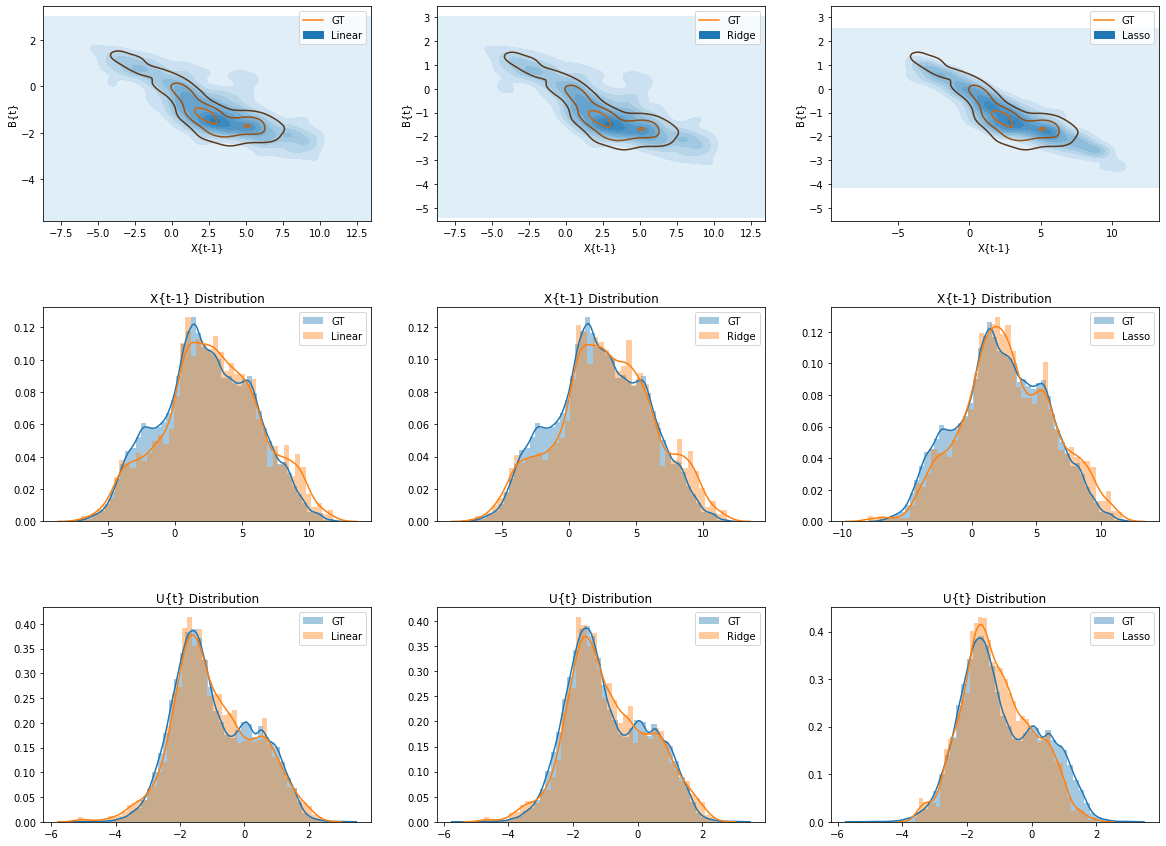

In [ ]:
dt = 0.0001
plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
### plot joint distribution
keysx = [str(dt)+'xsgd',str(dt)+'xridge',str(dt)+'xlasso']
keysb = [str(dt)+'bsgd',str(dt)+'bridge',str(dt)+'blasso']

for i in range(9):
    
    label = " "
    
    if i%3 == 0:
        label = 'Linear'
    elif i%3 == 1:
        label = 'Ridge'
    else:
        label = 'Lasso'
    
    # plot joint distribution
    if i < 3: 
        ax = plt.subplot2grid((3,3), (0, i))
        sns.kdeplot(dict_reg[keysx[i]].ravel()[::30],dict_reg[keysb[i]].ravel()[::30], shade= True, label = label)
        sns.kdeplot(dict_reg['0.0001xgt'].ravel()[::30],dict_reg['0.0001bgt'].ravel()[::30], label = 'GT',n_levels=3)
        plt.xlabel('X{t-1}')
        plt.ylabel('B{t}')
        plt.legend()
    
    # plot X{t} distribution
    if 3 <= i < 6:
        ax = plt.subplot2grid((3,3), (1, i%3))
        sns.distplot(dict_reg['0.0001xgt'].ravel(), label = 'GT');
        sns.distplot(dict_reg[keysx[i%3]].ravel()[::30], label = label);
        plt.title("X{t-1} Distribution")
        plt.legend();
    
    # plot B{t-1} distribution
    if i >= 6:
        ax = plt.subplot2grid((3,3), (2, i%3))
        sns.distplot(dict_reg['0.0001bgt'].ravel(), label = 'GT');
        sns.distplot(dict_reg[keysb[i%3]].ravel()[::30],label = label);
        plt.title("U{t} Distribution")
        plt.legend();
plt.savefig('jointdis1.jpg')

# dt = 0.001
### $X_{t-1}$, $B_{t}$ Distributions

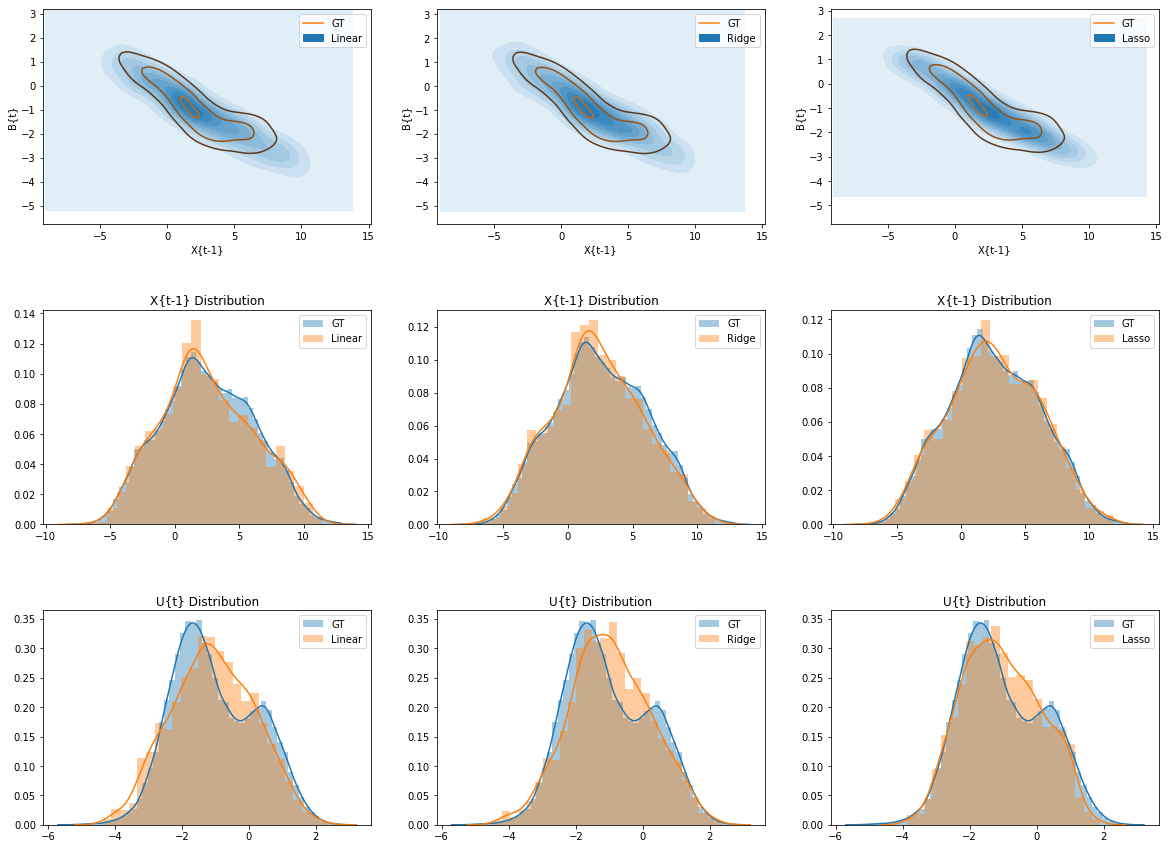

In [ ]:
dt = 0.001
plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
### plot joint distribution
keysx = [str(dt)+'xsgd',str(dt)+'xridge',str(dt)+'xlasso']
keysb = [str(dt)+'bsgd',str(dt)+'bridge',str(dt)+'blasso']

for i in range(9):
    
    label = " "
    
    if i%3 == 0:
        
        label = 'Linear'
    elif i%3 == 1:
        label = 'Ridge'
    else:
        label = 'Lasso'
    
    # plot joint distribution
    if i < 3: 
        ax = plt.subplot2grid((3,3), (0, i))
        sns.kdeplot(dict_reg[keysx[i]].ravel()[::30],dict_reg[keysb[i]].ravel()[::30], shade= True, label = label)
        sns.kdeplot(dict_reg['0.001xgt'].ravel()[::30],dict_reg['0.001bgt'].ravel()[::30], label = 'GT', n_levels=3)
        plt.xlabel('X{t-1}')
        plt.ylabel('B{t}')
        plt.legend()
    
    # plot X{t} distribution
    if 3 <= i < 6:
        ax = plt.subplot2grid((3,3), (1, i%3))
        sns.distplot(dict_reg['0.001xgt'].ravel(), label = 'GT');
        sns.distplot(dict_reg[keysx[i%3]].ravel()[::30], label = label);
        plt.title("X{t-1} Distribution")
        plt.legend();
    
    # plot B{t-1} distribution
    if i >= 6:
        ax = plt.subplot2grid((3,3), (2, i%3))
        sns.distplot(dict_reg['0.001bgt'].ravel(), label = 'GT');
        sns.distplot(dict_reg[keysb[i%3]].ravel()[::30],label = label);
        plt.title("U{t} Distribution")
        plt.legend();
plt.savefig('jointdis2.jpg')

# dt = 0.01
### $X_{t-1}$, $B_{t}$ Distributions

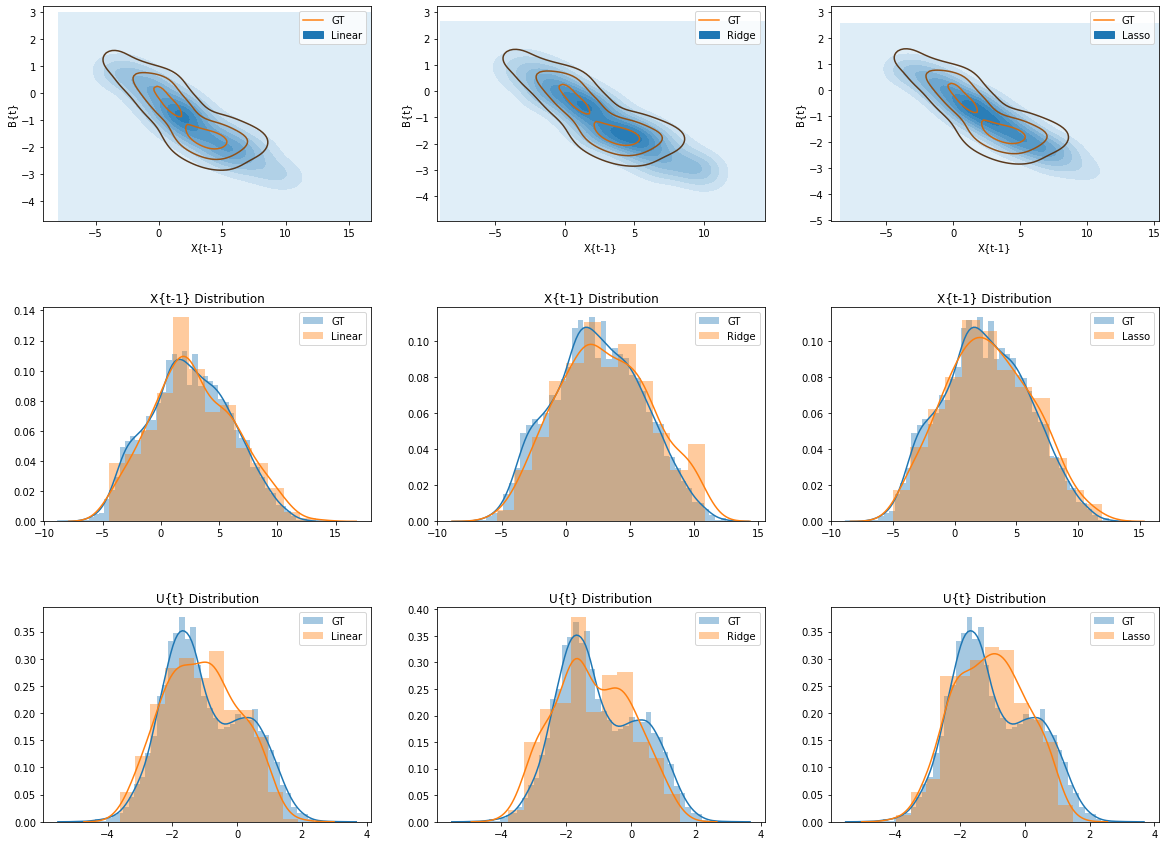

In [ ]:
dt = 0.01
plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
### plot joint distribution
keysx = [str(dt)+'xsgd',str(dt)+'xridge',str(dt)+'xlasso']
keysb = [str(dt)+'bsgd',str(dt)+'bridge',str(dt)+'blasso']

for i in range(9):
    
    label = " "
    
    if i%3 == 0:
        label = 'Linear'
    elif i%3 == 1:
        label = 'Ridge'
    else:
        label = 'Lasso'
    
    # plot joint distribution
    if i < 3: 
        ax = plt.subplot2grid((3,3), (0, i))
        sns.kdeplot(dict_reg[keysx[i]].ravel()[::30],dict_reg[keysb[i]].ravel()[::30], shade= True, label = label)
        sns.kdeplot(dict_reg['0.01xgt'].ravel()[::30],dict_reg['0.01bgt'].ravel()[::30], label = 'GT', n_levels=3)
        plt.xlabel('X{t-1}')
        plt.ylabel('B{t}')
        plt.legend()
    
    # plot X{t} distribution
    if 3 <= i < 6:
        ax = plt.subplot2grid((3,3), (1, i%3))
        sns.distplot(dict_reg['0.01xgt'].ravel(), label = 'GT');
        sns.distplot(dict_reg[keysx[i%3]].ravel()[::30], label = label);
        plt.title("X{t-1} Distribution")
        plt.legend();
    
    # plot B{t-1} distribution
    if i >= 6:
        ax = plt.subplot2grid((3,3), (2, i%3))
        sns.distplot(dict_reg['0.01bgt'].ravel(), label = 'GT');
        sns.distplot(dict_reg[keysb[i%3]].ravel()[::30],label = label);
        plt.title("U{t} Distribution")
        plt.legend();
plt.savefig('jointdis3.jpg')

## Mean and Variance of distributions

mean(X):
[2.312832882613539, 2.5749363233823606, 2.4901511043412135]
[2.409528666206897, 2.5014405354263403, 2.6094660154507574]
[2.4018881602040714, 2.4280935842627236, 2.5486481651276125]
[2.3781411462098654, 2.4611793498025825, 2.5087538942445]
Var(X):
[11.8358190928385, 12.605230134166224, 12.387717960895158]
[12.352101034426475, 12.414646263143648, 12.72905387658088]
[12.380547868090781, 12.247407159797744, 12.575843084527573]
[12.13452678028092, 12.359807796186105, 12.553060863026642]
mean(B):
[-0.9332078191926555, -1.0109443882866045, -0.9890815794839362]
[-0.9650399915309172, -0.9904938034715263, -1.0359322200297905]
[-0.9565750647336774, -0.9674006942116962, -1.0163998012741269]
[-0.9463718331418053, -0.9782663126087972, -0.9967435735939162]
Var(B):
[1.501726098104953, 1.5841506213395598, 1.5744739266231225]
[1.676652996590211, 1.3678170759205763, 1.2956906952393823]
[1.6596389722570026, 1.35208328389797, 1.3146420028789856]
[1.214667057642593, 1.2167516133750669, 1.1754459280

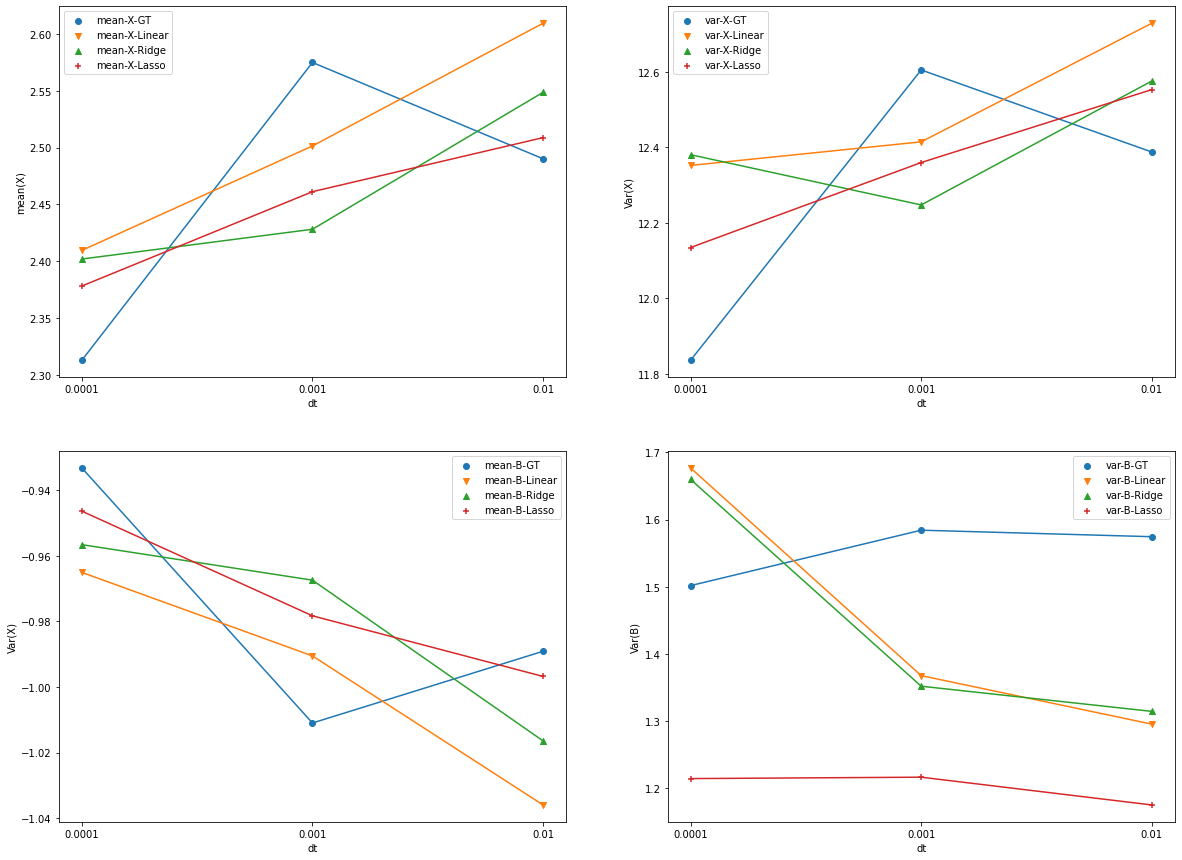

In [ ]:
plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
### plot joint distribution
xgt = ['0.0001xgt','0.001xgt','0.01xgt']
bgt = ['0.0001bgt','0.001bgt','0.01bgt']
keysx1 = ['0.0001xsgd','0.0001xridge','0.0001xlasso']
keysb1 = ['0.0001bsgd','0.0001bridge','0.0001blasso']
keysx2 = ['0.001xsgd','0.001xridge','0.001xlasso']
keysb2 = ['0.001bsgd','0.001bridge','0.001blasso']
keysx3 = ['0.01xsgd','0.01xridge','0.01xlasso']
keysb3 = ['0.01bsgd','0.01bridge','0.01blasso']
temp = ['0.0001','0.001','0.01']

plt.subplot(2,2,1)
gt = [dict_reg[xgt[0]].mean(),dict_reg[xgt[1]].mean(),dict_reg[xgt[2]].mean()]
ln = [dict_reg[keysx1[0]].mean(),dict_reg[keysx2[0]].mean(),dict_reg[keysx3[0]].mean()]
elas = [dict_reg[keysx1[1]].mean(),dict_reg[keysx2[1]].mean(),dict_reg[keysx3[1]].mean()]
lasso = [dict_reg[keysx1[2]].mean(),dict_reg[keysx2[2]].mean(),dict_reg[keysx3[2]].mean()]
plt.scatter(temp , gt , label = 'mean-X-GT', marker = 'o')
plt.plot(gt)
plt.scatter(temp , ln , label = 'mean-X-Linear', marker = 'v')
plt.plot(ln)
plt.scatter(temp , elas , label = 'mean-X-Ridge',  marker = '^')
plt.plot(elas)
plt.scatter(temp , lasso , label = 'mean-X-Lasso',  marker = '+')
plt.plot(lasso)
plt.legend()
plt.xlabel('dt')
plt.ylabel('mean(X)')
print('mean(X):')
print(gt)
print(ln)
print(elas)
print(lasso)

plt.subplot(2,2,2)
gt = [dict_reg[xgt[0]].var(),dict_reg[xgt[1]].var(),dict_reg[xgt[2]].var()]
ln = [dict_reg[keysx1[0]].var(),dict_reg[keysx2[0]].var(),dict_reg[keysx3[0]].var()]
elas = [dict_reg[keysx1[1]].var(),dict_reg[keysx2[1]].var(),dict_reg[keysx3[1]].var()]
lasso = [dict_reg[keysx1[2]].var(),dict_reg[keysx2[2]].var(),dict_reg[keysx3[2]].var()]
plt.scatter(temp , gt , label = 'var-X-GT', marker = 'o')
plt.plot(gt)
plt.scatter(temp , ln , label = 'var-X-Linear', marker = 'v')
plt.plot(ln)
plt.scatter(temp , elas , label = 'var-X-Ridge',  marker = '^')
plt.plot(elas)
plt.scatter(temp , lasso , label = 'var-X-Lasso',  marker = '+')
plt.plot(lasso)
plt.legend()
plt.xlabel('dt')
plt.ylabel('Var(X)')
print('Var(X):')
print(gt)
print(ln)
print(elas)
print(lasso)

plt.subplot(2,2,3)
gt = [dict_reg[bgt[0]].mean(),dict_reg[bgt[1]].mean(),dict_reg[bgt[2]].mean()]
ln = [dict_reg[keysb1[0]].mean(),dict_reg[keysb2[0]].mean(),dict_reg[keysb3[0]].mean()]
elas = [dict_reg[keysb1[1]].mean(),dict_reg[keysb2[1]].mean(),dict_reg[keysb3[1]].mean()]
lasso = [dict_reg[keysb1[2]].mean(),dict_reg[keysb2[2]].mean(),dict_reg[keysb3[2]].mean()]
plt.scatter(temp , gt , label = 'mean-B-GT', marker = 'o')
plt.plot(gt)
plt.scatter(temp , ln , label = 'mean-B-Linear', marker = 'v')
plt.plot(ln)
plt.scatter(temp , elas , label = 'mean-B-Ridge',  marker = '^')
plt.plot(elas)
plt.scatter(temp , lasso , label = 'mean-B-Lasso',  marker = '+')
plt.plot(lasso)
plt.legend()
plt.xlabel('dt')
plt.ylabel('mean(B)')
plt.xlabel('dt')
plt.ylabel('Var(X)')
print('mean(B):')
print(gt)
print(ln)
print(elas)
print(lasso)

plt.subplot(2,2,4)
gt = [dict_reg[bgt[0]].var(),dict_reg[bgt[1]].var(),dict_reg[bgt[2]].var()]
ln = [dict_reg[keysb1[0]].var(),dict_reg[keysb2[0]].var(),dict_reg[keysb3[0]].var()]
elas = [dict_reg[keysb1[1]].var(),dict_reg[keysb2[1]].var(),dict_reg[keysb3[1]].var()]
lasso = [dict_reg[keysb1[2]].var(),dict_reg[keysb2[2]].var(),dict_reg[keysb3[2]].var()]
plt.scatter(temp , gt , label = 'var-B-GT', marker = 'o')
plt.plot(gt)
plt.scatter(temp , ln , label = 'var-B-Linear', marker = 'v')
plt.plot(ln)
plt.scatter(temp , elas , label = 'var-B-Ridge',  marker = '^')
plt.plot(elas)
plt.scatter(temp , lasso , label = 'var-B-Lasso',  marker = '+')
plt.plot(lasso)
plt.legend()
plt.xlabel('dt')
plt.ylabel('Var(B)')
print('Var(B):')
print(gt)
print(ln)
print(elas)
print(lasso)

# MSE estimation errors

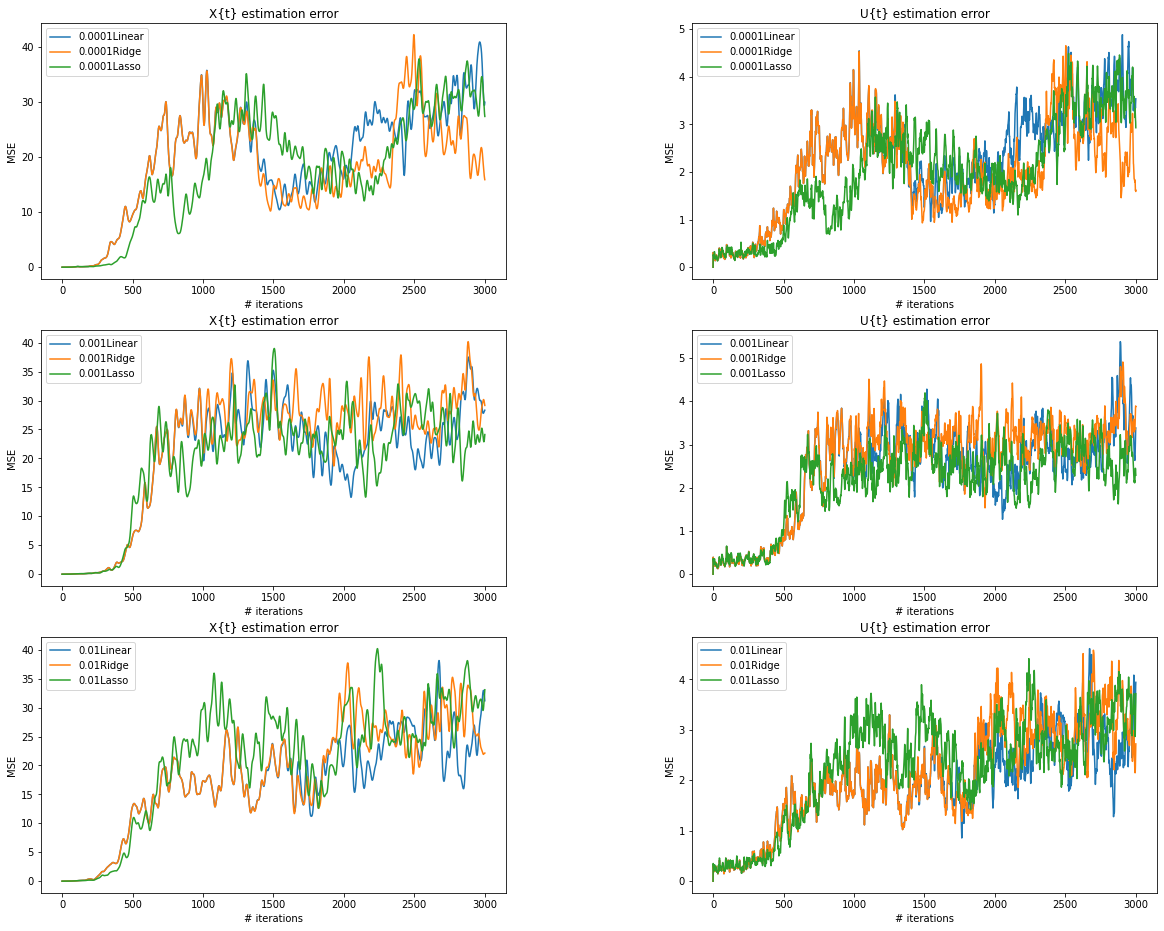

In [ ]:
### plot joint distribution
keysx1 = ['0.0001xsgd','0.001xsgd','0.01xsgd']
keysb1 = ['0.0001bsgd','0.001bsgd','0.01bsgd']
keysx2 = ['0.0001xridge','0.001xridge','0.01xridge']
keysb2 = ['0.0001bridge','0.001bridge','0.01bridge']
keysx3 = ['0.0001xlasso','0.001xlasso','0.01xlasso']
keysb3 = ['0.0001blasso','0.001blasso','0.01blasso']
temp = ['0.0001','0.001','0.01']

plt.figure(figsize=(20,16))
plt.subplots_adjust(wspace=0.4, hspace=0.2)

for i in range(3):
    plt.subplot(3,2,2*i+1)
    mse1 = ((dict_reg[keysx1[i]]- dict_reg[temp[i]+'xgt'])**2).mean(axis = 1)
    mse2 = ((dict_reg[keysx2[i]] - dict_reg[temp[i]+'xgt'])**2).mean(axis = 1)
    mse3 = ((dict_reg[keysx3[i]] - dict_reg[temp[i]+'xgt'])**2).mean(axis = 1)
    
    plt.plot(mse1, label = temp[i]+'Linear')
    plt.plot(mse2, label = temp[i]+'Ridge')
    plt.plot(mse3, label = temp[i]+'Lasso')
    plt.xlabel('# iterations')
    plt.ylabel('MSE')

    plt.title("X{t} estimation error")
    plt.legend()
    
    plt.subplot(3,2,2*(i+1))
    mse1 = ((dict_reg[keysb1[i]] - dict_reg[temp[i]+'bgt'])**2).mean(axis = 1)
    mse2 = ((dict_reg[keysb2[i]] - dict_reg[temp[i]+'bgt'])**2).mean(axis = 1)
    mse3 = ((dict_reg[keysb3[i]] - dict_reg[temp[i]+'bgt'])**2).mean(axis = 1)
    
    plt.plot(mse1, label = temp[i]+'Linear')
    plt.plot(mse2, label = temp[i]+'Ridge')
    plt.plot(mse3, label = temp[i]+'Lasso')
    plt.xlabel('# iterations')
    plt.ylabel('MSE')

    plt.title("U{t} estimation error")
    plt.legend()
    plt.savefig('erro.jpg')